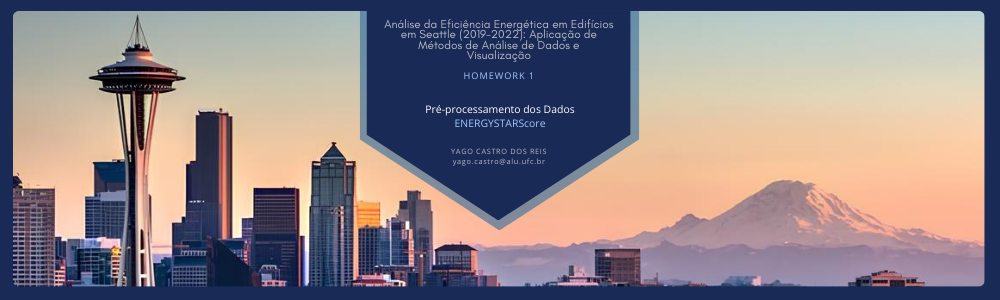

 # **Sumário**
 
 - [0. Imports](#Imports)
     - [0.1. Fortamação da Página](#Formatacao)
     - [0.2. Coleta dos Dados](#Coleta)
 - [Questão-04](#Q4)
 - [Questão-05](#Q5)
 - [Questão-06](#Q6)
 - [Questão-07](#Q7)
 - [Questão-08](#Q8)
 - [Questão-09](#Q9)
 - [Questão-10](#Q10)

<a id = 'Imports'></a>
# 0.Imports

In [2]:
!pip install "numpy<2"



     ---------------------------------------- 15.8/15.8 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\Yago\\anaconda3\\Lib\\site-packages\\~~mpy.libs\\libscipy_openblas64_-caad452230ae4ddb57899b8b3a33c55c.dll'
Consider using the `--user` option or check the permissions.



In [1]:
# Formatação da Página
from IPython.display import display, Markdown, Image, HTML

# Manipulação dos Dados:
import numpy  as np
import pandas as pd

# Visualizações:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Centralização dos Dados:
from sklearn.preprocessing import StandardScaler

# Escalonamento dos Dados:
from sklearn.preprocessing import MinMaxScaler

# Transformação de variáveis categóricas:
from sklearn.preprocessing import LabelEncoder

# Assimetria:
from scipy.stats import skew

# Ignorar os Warnigs
#import warnings
#warnings.simplefilter(action='ignore')

pd.set_option('display.max_columns', None)

<a id = 'Formatacao'></a>
## 0.1. Formatação da Página

In [2]:
# Código de Cores ANSI, para utilizar 
azul = "\033[38;2;10;31;68m"
verde = "\033[38;5;82m"
laranja = "\033[38;5;208m"
reset = '\033[0m'

# Formatação: 
HTML('''
<style>
    /* Aplicar fonte monoespaçada a todo o notebook */
    body, div.text_cell_render, div.code_cell pre, h1, h2, h3, h4, p {
        font-family: "Courier New", Consolas, Monaco, monospace; /* Fonte monoespaçada */
    }
    
    /* Estilo para h1 */
    h3{ 
        color: #0a1f44;            /* Cor do texto (azul marinho) */
        background-color: #dcdde1; /* Fundo azul escuro (cinza mais escuro) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h2 */
    h1{
        color: #dcdde1;            /* Cor do texto (cinza claro) */
        background-color: #0a1f44; /* Fundo azul escuro (azul marinho) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h3 */
    h2{
        color:#dcdde1;            /* Cor do texto (azul mais claro) */
        background-color: #40739e; /* Fundo azul escuro (cinza mais escuro) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h4 e h5 */
    h4, h5 {
        background-color:#40739e;  /* Fundo azul marinho */
        color: white;               /* Texto branco */
        border-radius: 8px;         /* Bordas arredondadas */
        padding: 10px;
    }
</style>
''')

<a id = 'Coleta'></a>
## 0.2. Coletando os Dados

In [3]:
# Caminho padrão para os dados:
pasta_df = r'C:\Users\Yago\Desktop\GitHubLocal\HomeWork2\1.dados'
pasta_dicionarios = r'C:\Users\Yago\Desktop\GitHubLocal\HomeWork2\1.dados\dicionario'

In [4]:
# Coletando o conjunto de dados:
df = pd.read_csv(f'{pasta_df}\\df_seattle_not_outliers.csv')

In [5]:
# Coletando os dicionários criados:
df_dict_filter_total = pd.read_csv(f'{pasta_dicionarios}\\df_dict_filter_total.csv')
df_dict_float = pd.read_csv(f'{pasta_dicionarios}\\df_dict_float.csv')
df_dict_int = pd.read_csv(f'{pasta_dicionarios}\\df_dict_int.csv')
df_dict_object = pd.read_csv(f'{pasta_dicionarios}\\df_dict_object.csv')

In [6]:
df.head()

,DataYear,BuildingType,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings,CouncilDistrictCode_bins
0,2019,SPS-District K-12,47.54576,-122.26853,SOUTHEAST,2,1961,2,56228.0,56228.0,0.0,91.00000,28.7,28.100,1688757.00,1653253.00,54.60,53.80,58916.0,240096.00,0.0,8340.00,819208.00,834045.00,49.300,0.9,1,Muito_Pequena
1,2019,NonResidential,47.65958,-122.31738,NORTHEAST,1,2001,6,88592.0,58006.0,22225.0,96.00000,49.6,49.600,3360246.00,3360246.00,106.70,106.70,67770.0,619827.00,0.0,12454.00,2114849.00,1245397.00,79.200,1.4,1,Muito_Pequena
2,2019,NonResidential,47.61130,-122.33659,DOWNTOWN,1,1973,5,88717.0,88717.0,0.0,77.00000,51.7,51.900,8756892.00,8800143.00,144.60,145.30,103362.0,1571232.56,0.0,0.00,5708139.68,0.00,54.200,0.6,1,Muito_Pequena
3,2019,NonResidential,47.61048,-122.33794,DOWNTOWN,1,1910,8,59400.0,59400.0,0.0,73.20295,40.8,40.800,2242016.00,2242016.00,114.20,114.20,48366.0,657097.00,0.0,0.00,2242016.00,0.00,13.800,0.2,1,Muito_Pequena
4,2019,NonResidential,47.60886,-122.33744,DOWNTOWN,7,1926,2,52549.0,52549.0,0.0,73.20295,96.0,95.886,9141320.22,8998438.58,188.28,188.44,23500.0,1339867.00,0.0,43301.02,4571626.00,4331672.12,211.494,9.3,1,Muito_Grande


In [7]:
# Definir a variável-alvo
target = 'ENERGYSTARScore'

# Verificar se a variável-alvo está no conjunto de dados
if target not in df.columns:
    raise ValueError(f"A variável-alvo '{target}' não está no conjunto de dados.")

# Calcular a correlação de Pearson entre a variável-alvo e as demais
correlations = df.corr()[target].drop(target)  # Remove a correlação com ela mesma

# Identificar a variável com maior correlação (absoluta)
best_variable = correlations.abs().idxmax()
best_correlation = correlations[best_variable]

# Exibir os resultados
print(f"A melhor variável para regressão é: {best_variable}")
print(f"Coeficiente de correlação com '{target}': {best_correlation}")

ValueError: could not convert string to float: 'SPS-District K-12'

In [ ]:
# Garantir que apenas variáveis numéricas sejam consideradas
df_numeric = df.select_dtypes(include=[np.number])

# Verificar se há variáveis numéricas suficientes
if df_numeric.shape[1] < 2:
    raise ValueError("O conjunto de dados precisa ter pelo menos duas variáveis numéricas.")

# Inicializar um dicionário para armazenar os resultados
results = {}

# Avaliar cada variável como alvo (target)
for target in df_numeric.columns:
    # Excluir a variável alvo das demais
    predictors = df_numeric.drop(columns=[target])
    
    # Calcular as correlações entre a variável alvo e os preditores
    correlations = predictors.corrwith(df_numeric[target]).fillna(0)
    
    # Calcular o somatório dos coeficientes de correlação ao quadrado
    score = (correlations**2).sum()
    
    # Armazenar o score no dicionário
    results[target] = score

# Identificar a melhor variável alvo
best_target = max(results, key=results.get)
best_score = results[best_target]

# Exibir os resultados
print("Ranking das variáveis como possíveis alvos:")
for var, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{var}: {score:.4f}")

print(f"\nA melhor variável como alvo é: {best_target}")
print(f"Score de explicação total: {best_score:.4f}")

# 1.Pré-processamento:

Pré-processamento de features do conjunto de dados.
Os pontos abaixo foram destacados com base na etapas que normalmente no projeto são realizadas nessa seção (Feature Engineering):

- Verificar registros duplicados: Não será necessário realizar essa etapa pois na Limpeza dos Dados, já foi realizado esse procedimento.
- Registros faltantes: Também não será necessário realizar o tratamento dos dados faltantes pois esse foi realizado na seção de Limpeza dos Dados.
- Variáveis temporais: Como o dataset contém apenas a variável "ano de obtenção dos dados", o único tratamento necessário será a normalização dessa variável;
- Transformação e padronização de valores:
- Encoding de variáveis categóricas:
- Formação e criação de novas features:
- Exclusão de features redundantes: 
- Verificação e remoção de multi-colunearidade:

In [8]:
# Fazendo uma cópia 
df1 = df.copy()

In [9]:
df1.head()

,DataYear,BuildingType,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings,CouncilDistrictCode_bins
0,2019,SPS-District K-12,47.54576,-122.26853,SOUTHEAST,2,1961,2,56228.0,56228.0,0.0,91.00000,28.7,28.100,1688757.00,1653253.00,54.60,53.80,58916.0,240096.00,0.0,8340.00,819208.00,834045.00,49.300,0.9,1,Muito_Pequena
1,2019,NonResidential,47.65958,-122.31738,NORTHEAST,1,2001,6,88592.0,58006.0,22225.0,96.00000,49.6,49.600,3360246.00,3360246.00,106.70,106.70,67770.0,619827.00,0.0,12454.00,2114849.00,1245397.00,79.200,1.4,1,Muito_Pequena
2,2019,NonResidential,47.61130,-122.33659,DOWNTOWN,1,1973,5,88717.0,88717.0,0.0,77.00000,51.7,51.900,8756892.00,8800143.00,144.60,145.30,103362.0,1571232.56,0.0,0.00,5708139.68,0.00,54.200,0.6,1,Muito_Pequena
3,2019,NonResidential,47.61048,-122.33794,DOWNTOWN,1,1910,8,59400.0,59400.0,0.0,73.20295,40.8,40.800,2242016.00,2242016.00,114.20,114.20,48366.0,657097.00,0.0,0.00,2242016.00,0.00,13.800,0.2,1,Muito_Pequena
4,2019,NonResidential,47.60886,-122.33744,DOWNTOWN,7,1926,2,52549.0,52549.0,0.0,73.20295,96.0,95.886,9141320.22,8998438.58,188.28,188.44,23500.0,1339867.00,0.0,43301.02,4571626.00,4331672.12,211.494,9.3,1,Muito_Grande


# 1.1. Realizando o encoding das variáveis categóricas

In [10]:
# Apresntação dos primeiros registros do conjunto de dados para varificação das variáveis:
df1.head()

,DataYear,BuildingType,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings,CouncilDistrictCode_bins
0,2019,SPS-District K-12,47.54576,-122.26853,SOUTHEAST,2,1961,2,56228.0,56228.0,0.0,91.00000,28.7,28.100,1688757.00,1653253.00,54.60,53.80,58916.0,240096.00,0.0,8340.00,819208.00,834045.00,49.300,0.9,1,Muito_Pequena
1,2019,NonResidential,47.65958,-122.31738,NORTHEAST,1,2001,6,88592.0,58006.0,22225.0,96.00000,49.6,49.600,3360246.00,3360246.00,106.70,106.70,67770.0,619827.00,0.0,12454.00,2114849.00,1245397.00,79.200,1.4,1,Muito_Pequena
2,2019,NonResidential,47.61130,-122.33659,DOWNTOWN,1,1973,5,88717.0,88717.0,0.0,77.00000,51.7,51.900,8756892.00,8800143.00,144.60,145.30,103362.0,1571232.56,0.0,0.00,5708139.68,0.00,54.200,0.6,1,Muito_Pequena
3,2019,NonResidential,47.61048,-122.33794,DOWNTOWN,1,1910,8,59400.0,59400.0,0.0,73.20295,40.8,40.800,2242016.00,2242016.00,114.20,114.20,48366.0,657097.00,0.0,0.00,2242016.00,0.00,13.800,0.2,1,Muito_Pequena
4,2019,NonResidential,47.60886,-122.33744,DOWNTOWN,7,1926,2,52549.0,52549.0,0.0,73.20295,96.0,95.886,9141320.22,8998438.58,188.28,188.44,23500.0,1339867.00,0.0,43301.02,4571626.00,4331672.12,211.494,9.3,1,Muito_Grande


In [11]:
# Filtrando e armazenando as variáveis categóricas do conjunto de dados:
cat_vars = [var for var in df1.columns if df1[var].dtypes == 'O']
cat_vars

['BuildingType', 'Neighborhood', 'CouncilDistrictCode_bins']

In [12]:
# Apresentando somente as variáveis categóricas do dataset:
df1[['BuildingType', 'Neighborhood', 'CouncilDistrictCode_bins']].head()

,BuildingType,Neighborhood,CouncilDistrictCode_bins
0,SPS-District K-12,SOUTHEAST,Muito_Pequena
1,NonResidential,NORTHEAST,Muito_Pequena
2,NonResidential,DOWNTOWN,Muito_Pequena
3,NonResidential,DOWNTOWN,Muito_Pequena
4,NonResidential,DOWNTOWN,Muito_Grande


In [14]:
# Verificar os valores únicos de cada variável categórica:
print(f'Valores únicos da variável {laranja}BuildingType{reset}: \n{df1["BuildingType"].value_counts()}\n\n')
print(f'Valores únicos da variável {azul}Neighborhood{reset}: \n{df1["Neighborhood"].value_counts()}\n\n')
print(f'Valores únicos da variável {verde}CouncilDistrictCode_bins{reset}: \n{df1["CouncilDistrictCode_bins"].value_counts()}')


Valores únicos da variável BuildingType: 
BuildingType
NonResidential          3025
Multifamily LR (1-4)    2949
Multifamily MR (5-9)    1843
SPS-District K-12        328
Multifamily HR (10+)     267
Nonresidential COS       188
Campus                   128
Nonresidential WA         19
Name: count, dtype: int64


Valores únicos da variável Neighborhood: 
Neighborhood
MAGNOLIA / QUEEN ANNE                                    1281
EAST                                                     1264
DOWNTOWN                                                 1058
GREATER DUWAMISH                                          812
LAKE UNION                                                772
NORTHEAST                                                 720
NORTHWEST                                                 584
NORTH                                                     432
SOUTHWEST                                                 400
BALLARD                                                   348
SOUTHEAST 

<span style="color:blue">Comentários</span>
Analisando os valores únicos de cada variável categórica podemos classificar as técnicas de transformação das variáveis categóricas para númericas para cada variável:

- BuildingType:
->Codificação de Label:transforma cada categoria em um número único. [Conjunto de dados 1]
-> One Hot Encoder: Essa técnica converte cada categoria em uma nova coluna binária, onde um valor 1 indica a presença da categoria e 0 sua ausência.[Conjunto de dados 2]

- Neighborhood:
->Codificação de Frequência: substitui cada categoria pelo número de vezes que ela aparece no conjunto de dados. [Conjunto de dados 1]
-> One Hot Encoder: Essa técnica converte cada categoria em uma nova coluna binária, onde um valor 1 indica a presença da categoria e 0 sua ausência.[Conjunto de dados 2]

- CouncilDistrictCode_bins:
->Codificação de Label: transforma cada categoria em um número único. [Conjunto de dados 1]
-> One Hot Encoder: Essa técnica converte cada categoria em uma nova coluna binária, onde um valor 1 indica a presença da categoria e 0 sua ausência.[Conjunto de dados 2]

## Tratamento das variáveis categóricas para o primeiro conjunto de dados:

In [15]:
# Criando uma nova cópia do dataset:
df1_1 = df1.copy()

### BuildingType:

In [16]:
# Dicionário de mapeamento
label_mapping = {
    'NonResidential': 1,
    'Multifamily LR (1-4)': 2,
    'Multifamily MR (5-9)': 3,
    'SPS-District K-12': 4,
    'Multifamily HR (10+)': 5,
    'Nonresidential COS': 6,
    'Campus': 7,
    'Nonresidential WA': 8
}

# Aplicando o mapeamento
df1_1['BuildingType_Label'] = df1_1['BuildingType'].map(label_mapping)


In [17]:
df1_1.head()

,DataYear,BuildingType,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings,CouncilDistrictCode_bins,BuildingType_Label
0,2019,SPS-District K-12,47.54576,-122.26853,SOUTHEAST,2,1961,2,56228.0,56228.0,0.0,91.00000,28.7,28.100,1688757.00,1653253.00,54.60,53.80,58916.0,240096.00,0.0,8340.00,819208.00,834045.00,49.300,0.9,1,Muito_Pequena,4
1,2019,NonResidential,47.65958,-122.31738,NORTHEAST,1,2001,6,88592.0,58006.0,22225.0,96.00000,49.6,49.600,3360246.00,3360246.00,106.70,106.70,67770.0,619827.00,0.0,12454.00,2114849.00,1245397.00,79.200,1.4,1,Muito_Pequena,1
2,2019,NonResidential,47.61130,-122.33659,DOWNTOWN,1,1973,5,88717.0,88717.0,0.0,77.00000,51.7,51.900,8756892.00,8800143.00,144.60,145.30,103362.0,1571232.56,0.0,0.00,5708139.68,0.00,54.200,0.6,1,Muito_Pequena,1
3,2019,NonResidential,47.61048,-122.33794,DOWNTOWN,1,1910,8,59400.0,59400.0,0.0,73.20295,40.8,40.800,2242016.00,2242016.00,114.20,114.20,48366.0,657097.00,0.0,0.00,2242016.00,0.00,13.800,0.2,1,Muito_Pequena,1
4,2019,NonResidential,47.60886,-122.33744,DOWNTOWN,7,1926,2,52549.0,52549.0,0.0,73.20295,96.0,95.886,9141320.22,8998438.58,188.28,188.44,23500.0,1339867.00,0.0,43301.02,4571626.00,4331672.12,211.494,9.3,1,Muito_Grande,1


### Neighborhood:

In [18]:
# Contagem da frequência de cada valor na coluna 'Neighborhood'
neighborhood_counts = df1_1['Neighborhood'].value_counts()

# Mapeando as frequências para uma nova coluna
df1_1['Neighborhood_Frequency'] = df1_1['Neighborhood'].map(neighborhood_counts)

In [19]:
df1_1.head()

,DataYear,BuildingType,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings,CouncilDistrictCode_bins,BuildingType_Label,Neighborhood_Frequency
0,2019,SPS-District K-12,47.54576,-122.26853,SOUTHEAST,2,1961,2,56228.0,56228.0,0.0,91.00000,28.7,28.100,1688757.00,1653253.00,54.60,53.80,58916.0,240096.00,0.0,8340.00,819208.00,834045.00,49.300,0.9,1,Muito_Pequena,4,308
1,2019,NonResidential,47.65958,-122.31738,NORTHEAST,1,2001,6,88592.0,58006.0,22225.0,96.00000,49.6,49.600,3360246.00,3360246.00,106.70,106.70,67770.0,619827.00,0.0,12454.00,2114849.00,1245397.00,79.200,1.4,1,Muito_Pequena,1,720
2,2019,NonResidential,47.61130,-122.33659,DOWNTOWN,1,1973,5,88717.0,88717.0,0.0,77.00000,51.7,51.900,8756892.00,8800143.00,144.60,145.30,103362.0,1571232.56,0.0,0.00,5708139.68,0.00,54.200,0.6,1,Muito_Pequena,1,1058
3,2019,NonResidential,47.61048,-122.33794,DOWNTOWN,1,1910,8,59400.0,59400.0,0.0,73.20295,40.8,40.800,2242016.00,2242016.00,114.20,114.20,48366.0,657097.00,0.0,0.00,2242016.00,0.00,13.800,0.2,1,Muito_Pequena,1,1058
4,2019,NonResidential,47.60886,-122.33744,DOWNTOWN,7,1926,2,52549.0,52549.0,0.0,73.20295,96.0,95.886,9141320.22,8998438.58,188.28,188.44,23500.0,1339867.00,0.0,43301.02,4571626.00,4331672.12,211.494,9.3,1,Muito_Grande,1,1058


### CouncilDistrictCode_bins:

In [20]:
# Dicionário de mapeamento
label_mapping = {
    'Muito_Pequena': 0,
    'Muito_Grande': 4,
    'Pequena': 1,
    'Grande': 3,
    'Média': 2
}

# Aplicando o mapeamento na coluna 'CouncilDistrictCode_bins'
df1_1['CouncilDistrictCode_bins_Label'] = df1_1['CouncilDistrictCode_bins'].map(label_mapping)

In [21]:
df1_1.head()

,DataYear,BuildingType,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings,CouncilDistrictCode_bins,BuildingType_Label,Neighborhood_Frequency,CouncilDistrictCode_bins_Label
0,2019,SPS-District K-12,47.54576,-122.26853,SOUTHEAST,2,1961,2,56228.0,56228.0,0.0,91.00000,28.7,28.100,1688757.00,1653253.00,54.60,53.80,58916.0,240096.00,0.0,8340.00,819208.00,834045.00,49.300,0.9,1,Muito_Pequena,4,308,0
1,2019,NonResidential,47.65958,-122.31738,NORTHEAST,1,2001,6,88592.0,58006.0,22225.0,96.00000,49.6,49.600,3360246.00,3360246.00,106.70,106.70,67770.0,619827.00,0.0,12454.00,2114849.00,1245397.00,79.200,1.4,1,Muito_Pequena,1,720,0
2,2019,NonResidential,47.61130,-122.33659,DOWNTOWN,1,1973,5,88717.0,88717.0,0.0,77.00000,51.7,51.900,8756892.00,8800143.00,144.60,145.30,103362.0,1571232.56,0.0,0.00,5708139.68,0.00,54.200,0.6,1,Muito_Pequena,1,1058,0
3,2019,NonResidential,47.61048,-122.33794,DOWNTOWN,1,1910,8,59400.0,59400.0,0.0,73.20295,40.8,40.800,2242016.00,2242016.00,114.20,114.20,48366.0,657097.00,0.0,0.00,2242016.00,0.00,13.800,0.2,1,Muito_Pequena,1,1058,0
4,2019,NonResidential,47.60886,-122.33744,DOWNTOWN,7,1926,2,52549.0,52549.0,0.0,73.20295,96.0,95.886,9141320.22,8998438.58,188.28,188.44,23500.0,1339867.00,0.0,43301.02,4571626.00,4331672.12,211.494,9.3,1,Muito_Grande,1,1058,4


In [22]:
# Dropando as variáveis categóricas:
df1_1 = df1_1.drop(columns = ['BuildingType', 'Neighborhood', 'CouncilDistrictCode_bins'], axis=1)

In [23]:
# Verificando o tipo dos dados:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DataYear                        8747 non-null   int64  
 1   Latitude                        8747 non-null   float64
 2   Longitude                       8747 non-null   float64
 3   CouncilDistrictCode             8747 non-null   int64  
 4   YearBuilt                       8747 non-null   int64  
 5   NumberofFloors                  8747 non-null   int64  
 6   PropertyGFATotal                8747 non-null   float64
 7   PropertyGFABuilding(s)          8747 non-null   float64
 8   PropertyGFAParking              8747 non-null   float64
 9   ENERGYSTARScore                 8747 non-null   float64
 10  SiteEUIWN(kBtu/sf)              8747 non-null   float64
 11  SiteEUI(kBtu/sf)                8747 non-null   float64
 12  SiteEnergyUse(kBtu)             87

## Tratamento das variáveis categóricas para o segundo conjunto de dados:

In [33]:
# Criando uma nova cópia do dataset:
df1_2 = df1.copy()

In [34]:
# Aplicar One Hot Encoding
df1_2 = pd.get_dummies(df1_2, columns=['BuildingType', 'Neighborhood', 'CouncilDistrictCode_bins'])

In [36]:
# Identificando colunas do tipo booleano
bool_columns = df1_2.select_dtypes(include=['bool']).columns

# Convertendo as colunas booleanas para int8
df1_2[bool_columns] = df1_2[bool_columns].astype('int8')


In [37]:
df1_2.head()



,DataYear,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberofBuildings,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SHARED: BALLARD & LAKE UNION,Neighborhood_SHARED: BALLARD &amp; LAKE UNION,Neighborhood_SHARED: CENTRAL & EAST,Neighborhood_SHARED: CENTRAL &amp; EAST,Neighborhood_SHARED: GREATER DUWAMISH & DELRIDGE NEIGHBORHOODS,Neighborhood_SHARED: GREATER DUWAMISH &amp; DELRIDGE NEIGHBORHOODS,Neighborhood_SHARED: LAKE UNION & NORTHWEST,Neighborhood_SHARED: LAKE UNION &amp; NORTHWEST,Neighborhood_SHARED: NORTH & NORTHWEST,Neighborhood_SHARED: NORTH &amp; NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,Neighborhood_water,CouncilDistrictCode_bins_Grande,CouncilDistrictCode_bins_Muito_Grande,CouncilDistrictCode_bins_Muito_Pequena,CouncilDistrictCode_bins_Média,CouncilDistrictCode_bins_Pequena
0,2019,47.54576,-122.26853,2,1961,2,56228.0,56228.0,0.0,91.00000,28.7,28.100,1688757.00,1653253.00,54.60,53.80,58916.0,240096.00,0.0,8340.00,819208.00,834045.00,49.300,0.9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2019,47.65958,-122.31738,1,2001,6,88592.0,58006.0,22225.0,96.00000,49.6,49.600,3360246.00,3360246.00,106.70,106.70,67770.0,619827.00,0.0,12454.00,2114849.00,1245397.00,79.200,1.4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2019,47.61130,-122.33659,1,1973,5,88717.0,88717.0,0.0,77.00000,51.7,51.900,8756892.00,8800143.00,144.60,145.30,103362.0,1571232.56,0.0,0.00,5708139.68,0.00,54.200,0.6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2019,47.61048,-122.33794,1,1910,8,59400.0,59400.0,0.0,73.20295,40.8,40.800,2242016.00,2242016.00,114.20,114.20,48366.0,657097.00,0.0,0.00,2242016.00,0.00,13.800,0.2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2019,47.60886,-122.33744,7,1926,2,52549.0,52549.0,0.0,73.20295,96.0,95.886,9141320.22,8998438.58,188.28,188.44,23500.0,1339867.00,0.0,43301.02,4571626.00,4331672.12,211.494,9.3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [38]:
# Dropando as variáveis categóricas:
#df1_2 = df1_2.drop(columns = ['BuildingType', 'Neighborhood', 'CouncilDistrictCode_bins'], axis=1)

In [39]:
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 62 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   DataYear                                                            8747 non-null   int64  
 1   Latitude                                                            8747 non-null   float64
 2   Longitude                                                           8747 non-null   float64
 3   CouncilDistrictCode                                                 8747 non-null   int64  
 4   YearBuilt                                                           8747 non-null   int64  
 5   NumberofFloors                                                      8747 non-null   int64  
 6   PropertyGFATotal                                                    8747 non-null   float64
 7   PropertyGFABuil

## Determinação da variável alvo/target:
Antes de realizar os próximos procedimentos de pré-processamento dos dados é importante definir a variável alvo da aplicação da regressão, pois nessa variável não é recomendado aplicar técnicas de normalização

- Interpretação dos Resultados: A variável alvo representa a previsão ou o valor que você está tentando prever, então a escala dos seus dados de entrada (features) deve ser consistente com a escala do alvo. Se você centralizar o alvo, isso pode tornar a interpretação dos resultados mais difícil.

- Evitar distorção nos modelos de regressão: Em modelos como regressão linear ou redes neurais, centralizar o alvo pode afetar o processo de otimização, pois o modelo precisa entender a relação entre as variáveis independentes (features) e a variável dependente (target). A centralização da variável alvo pode interferir no ajuste do modelo.

### Método de escolha da variável alvo:
- Iterar Sobre Cada Variável Como Alvo: Para cada variável, calculamos a correlação com todas as outras.
- Somatório dos Coeficientes de Correlação ao Quadrado: Isso reflete o grau de explicação total das outras variáveis sobre a variável alvo.
- Selecionar a Melhor Variável Alvo: A variável com o maior somatório é escolhida como a melhor.

In [27]:
# Garantir que apenas variáveis numéricas sejam consideradas
df_numeric = df1_1.select_dtypes(include=[np.number])

# Verificar se há variáveis numéricas suficientes
if df_numeric.shape[1] < 2:
    raise ValueError("O conjunto de dados precisa ter pelo menos duas variáveis numéricas.")

# Inicializar um dicionário para armazenar os resultados
results = {}

# Avaliar cada variável como alvo (target)
for target in df_numeric.columns:
    # Excluir a variável alvo das demais
    predictors = df_numeric.drop(columns=[target])
    
    # Calcular as correlações entre a variável alvo e os preditores
    correlations = predictors.corrwith(df_numeric[target]).fillna(0)
    
    # Calcular o somatório dos coeficientes de correlação ao quadrado
    score = (correlations**2).sum()
    
    # Armazenar o score no dicionário
    results[target] = score

# Identificar a melhor variável alvo
best_target = max(results, key=results.get)
best_score = results[best_target]

# Exibir os resultados
print("Ranking das variáveis como possíveis alvos:")
for var, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{var}: {score:.4f}")

print(f"\nA melhor variável como alvo é: {best_target}")
print(f"Score de explicação total: {best_score:.4f}")

Ranking das variáveis como possíveis alvos:
SiteEnergyUse(kBtu): 8.3115
SiteEnergyUseWN(kBtu): 8.3110
Electricity(kBtu): 7.0398
Electricity(kWh): 7.0173
TotalGHGEmissions: 6.8668
PropertyGFATotal: 6.1265
PropertyGFABuilding(s): 5.9378
LargestPropertyUseTypeGFA: 5.7787
SiteEUI(kBtu/sf): 5.6642
SiteEUIWN(kBtu/sf): 5.6500
NaturalGas(kBtu): 5.2797
NaturalGas(therms): 5.2681
SourceEUIWN(kBtu/sf): 5.0212
SourceEUI(kBtu/sf): 5.0212
GHGEmissionsIntensity: 3.7478
PropertyGFAParking: 1.8005
NumberofFloors: 1.6683
ENERGYSTARScore: 1.2340
YearBuilt: 0.7278
NumberofBuildings: 0.4320
CouncilDistrictCode: 0.3870
SteamUse(kBtu): 0.3444
Latitude: 0.2340
Longitude: 0.0949
DataYear: 0.0250

A melhor variável como alvo é: SiteEnergyUse(kBtu)
Score de explicação total: 8.3115


In [28]:
# Garantir que apenas variáveis numéricas sejam consideradas
df_numeric = df1_2.select_dtypes(include=[np.number])

# Verificar se há variáveis numéricas suficientes
if df_numeric.shape[1] < 2:
    raise ValueError("O conjunto de dados precisa ter pelo menos duas variáveis numéricas.")

# Inicializar um dicionário para armazenar os resultados
results = {}

# Avaliar cada variável como alvo (target)
for target in df_numeric.columns:
    # Excluir a variável alvo das demais
    predictors = df_numeric.drop(columns=[target])
    
    # Calcular as correlações entre a variável alvo e os preditores
    correlations = predictors.corrwith(df_numeric[target]).fillna(0)
    
    # Calcular o somatório dos coeficientes de correlação ao quadrado
    score = (correlations**2).sum()
    
    # Armazenar o score no dicionário
    results[target] = score

# Identificar a melhor variável alvo
best_target = max(results, key=results.get)
best_score = results[best_target]

# Exibir os resultados
print("Ranking das variáveis como possíveis alvos:")
for var, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{var}: {score:.4f}")

print(f"\nA melhor variável como alvo é: {best_target}")
print(f"Score de explicação total: {best_score:.4f}")

Ranking das variáveis como possíveis alvos:
SiteEnergyUse(kBtu): 8.7793
SiteEnergyUseWN(kBtu): 8.7787
Electricity(kBtu): 7.4741
Electricity(kWh): 7.4501
TotalGHGEmissions: 7.2343
PropertyGFATotal: 6.4984
PropertyGFABuilding(s): 6.3313
LargestPropertyUseTypeGFA: 6.1231
SiteEUI(kBtu/sf): 6.0049
SiteEUIWN(kBtu/sf): 5.9898
NaturalGas(kBtu): 5.5240
NaturalGas(therms): 5.5119
SourceEUIWN(kBtu/sf): 5.3461
SourceEUI(kBtu/sf): 5.3461
GHGEmissionsIntensity: 3.9555
BuildingType_Multifamily LR (1-4): 2.5133
NumberofFloors: 2.4551
CouncilDistrictCode: 2.2954
CouncilDistrictCode_bins_Muito_Pequena: 2.2811
PropertyGFAParking: 1.9964
Latitude: 1.8804
CouncilDistrictCode_bins_Muito_Grande: 1.8425
BuildingType_NonResidential: 1.6106
ENERGYSTARScore: 1.3762
CouncilDistrictCode_bins_Grande: 1.3253
Longitude: 1.3161
CouncilDistrictCode_bins_Pequena: 1.1863
YearBuilt: 0.9963
Neighborhood_EAST: 0.9726
BuildingType_Multifamily MR (5-9): 0.9054
Neighborhood_DOWNTOWN: 0.9048
Neighborhood_MAGNOLIA / QUEEN ANNE: 

### Explicação sobre a variável alvo e como ela pode ser útil?

## Centralização dos Dados
Quando Aplicar a Centralização:
Modelos que dependem da distância: Como KNN, SVM, e redes neurais.
Modelos que utilizam regularização: Como regressão linear regularizada (Ridge, Lasso) e regressão logística.
Análises de Componentes Principais (PCA): Quando você estiver utilizando PCA, a centralização é um passo essencial, pois o PCA depende da variância dos dados.

A centralização dos dados (também conhecida como "normalização para média zero") é uma técnica comum em pré-processamento de dados, onde a média de cada variável é subtraída, e o resultado é dividido pelo desvio padrão. Isso resulta em dados com média zero e desvio padrão igual a 1. A centralização ajuda a melhorar o desempenho de muitos algoritmos de aprendizado de máquina, especialmente quando há variáveis com escalas diferentes.

Processo de Centralização dos Dados:
A centralização pode ser feita facilmente utilizando o Pandas ou Scikit-learn. Aqui está o processo básico:

Calcular a Média: Para cada variável (coluna), calcule a média.
Subtrair a Média: Subtraia a média de cada valor da variável.
Dividir pelo Desvio Padrão (opcional para normalização completa): Divida cada valor pela variabilidade (desvio padrão) da variável.

Evite centralizar variáveis categóricas ou variáveis com valores binários (0 ou 1), pois esses dados já estão em uma forma adequada para a maioria dos modelos.

array([[<AxesSubplot:title={'center':'DataYear'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'CouncilDistrictCode'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'NumberofFloors'}>,
        <AxesSubplot:title={'center':'PropertyGFATotal'}>,
        <AxesSubplot:title={'center':'PropertyGFABuilding(s)'}>,
        <AxesSubplot:title={'center':'PropertyGFAParking'}>,
        <AxesSubplot:title={'center':'ENERGYSTARScore'}>],
       [<AxesSubplot:title={'center':'SiteEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUseWN(kBtu)'}>,
        <AxesSubplot:title={'center':'SourceEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SourceEUI(kBtu/sf)'}>],
       [<AxesSubplot:title={'center':'LargestPropertyUseTypeGFA'}>,
        <AxesSubplot:title={'center':'Electricity(kWh

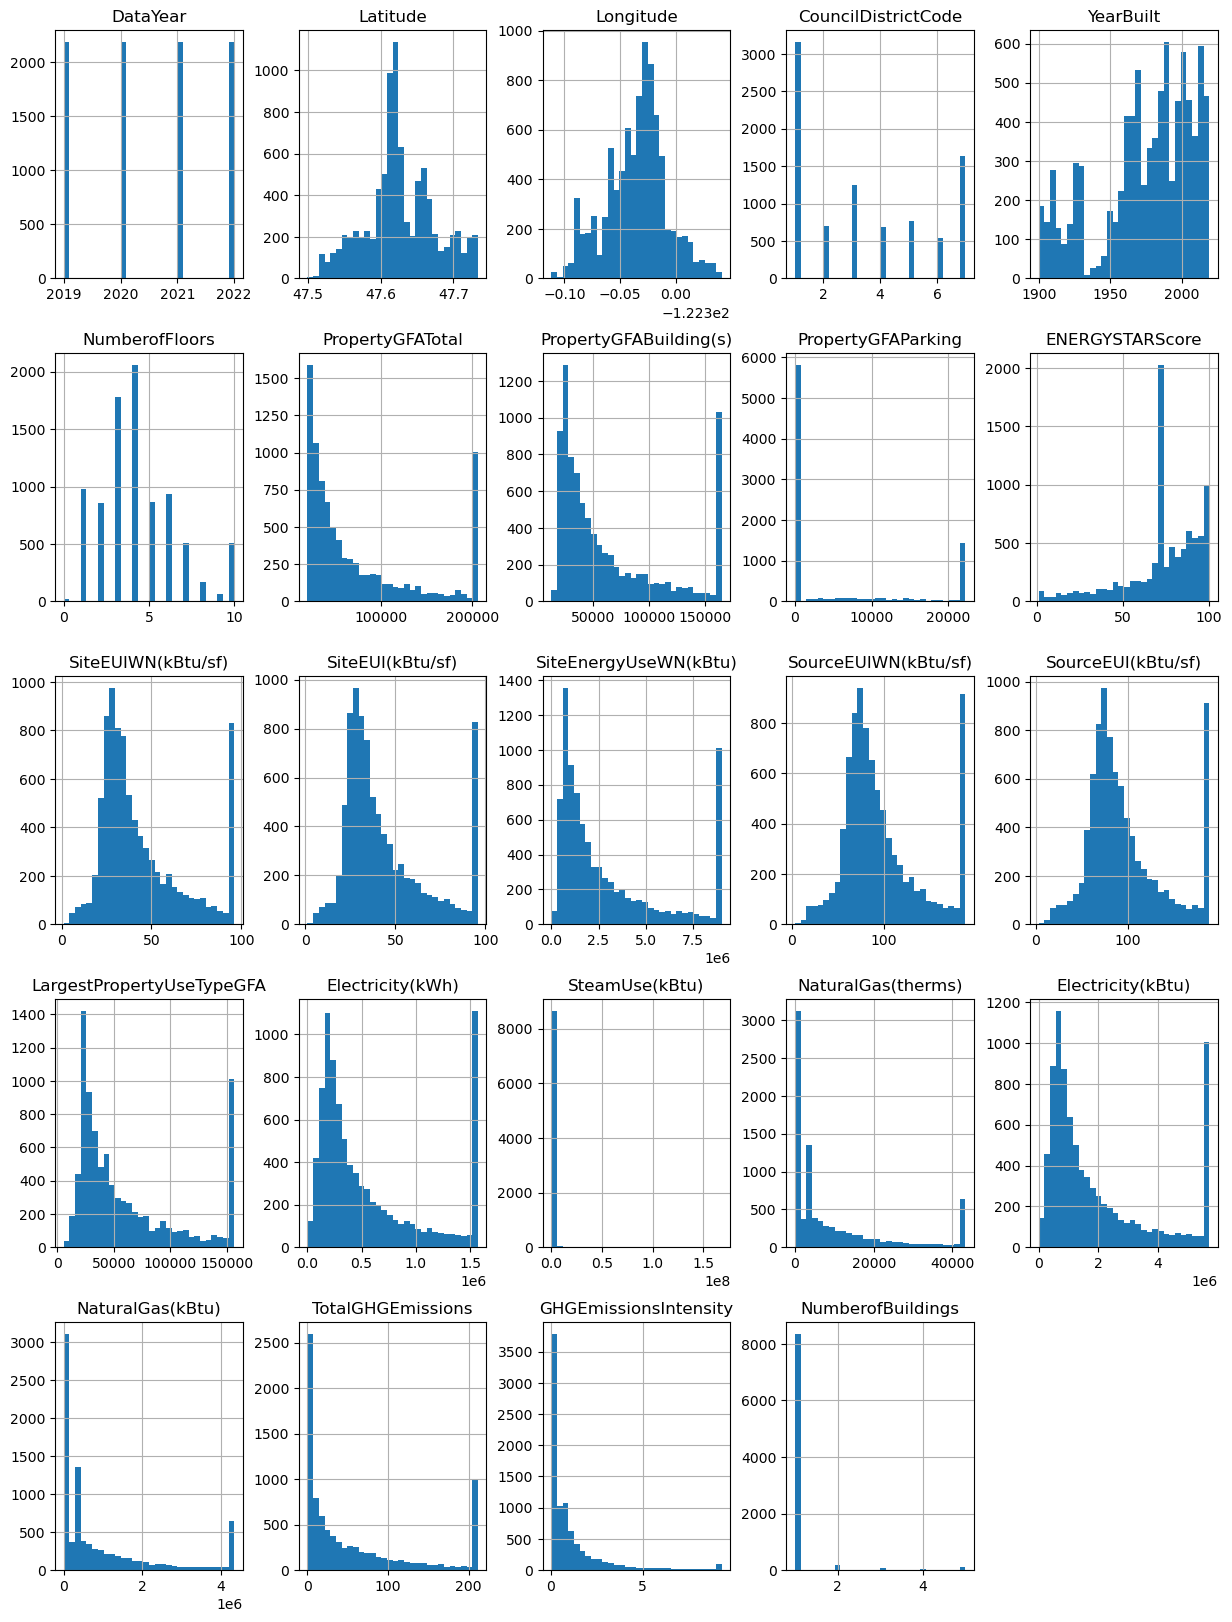

In [36]:
# Antes da centralização
X_1.hist(figsize=(15, 20), bins=30)

### Centralização/Padronização das variáveis do primeiro conjunto de dados

In [126]:
# Separamos as variáveis de entrada (features) e a variável alvo (target)
X_1 = df1_1.drop(columns='TotalGHGEmissions') 
y_1 = df1_1['TotalGHGEmissions']              

# Função para verificar se a coluna é numérica
def is_numeric(column):
    return pd.api.types.is_numeric_dtype(column)

# Centralizando e normalizando apenas as variáveis numéricas de entrada
scaler = StandardScaler()

# Aplicar centralização e normalização nas variáveis de entrada (features)
X_1_centralizados = X_1.copy()  

for column in X_1.columns:
    if is_numeric(X_1[column]):  # Verifica se a coluna é numérica
        X_1_centralizados[column] = scaler.fit_transform(X_1[column].values.reshape(-1, 1))

# Agora, você pode usar X_centered e y (sem modificação) para treinar seu modelo
#print(X_1_centralizados)
#print(y_1)

array([[<AxesSubplot:title={'center':'DataYear'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'CouncilDistrictCode'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'NumberofFloors'}>,
        <AxesSubplot:title={'center':'PropertyGFATotal'}>,
        <AxesSubplot:title={'center':'PropertyGFABuilding(s)'}>,
        <AxesSubplot:title={'center':'PropertyGFAParking'}>,
        <AxesSubplot:title={'center':'ENERGYSTARScore'}>],
       [<AxesSubplot:title={'center':'SiteEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUse(kBtu)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUseWN(kBtu)'}>,
        <AxesSubplot:title={'center':'SourceEUIWN(kBtu/sf)'}>],
       [<AxesSubplot:title={'center':'SourceEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'LargestPropertyUseTyp

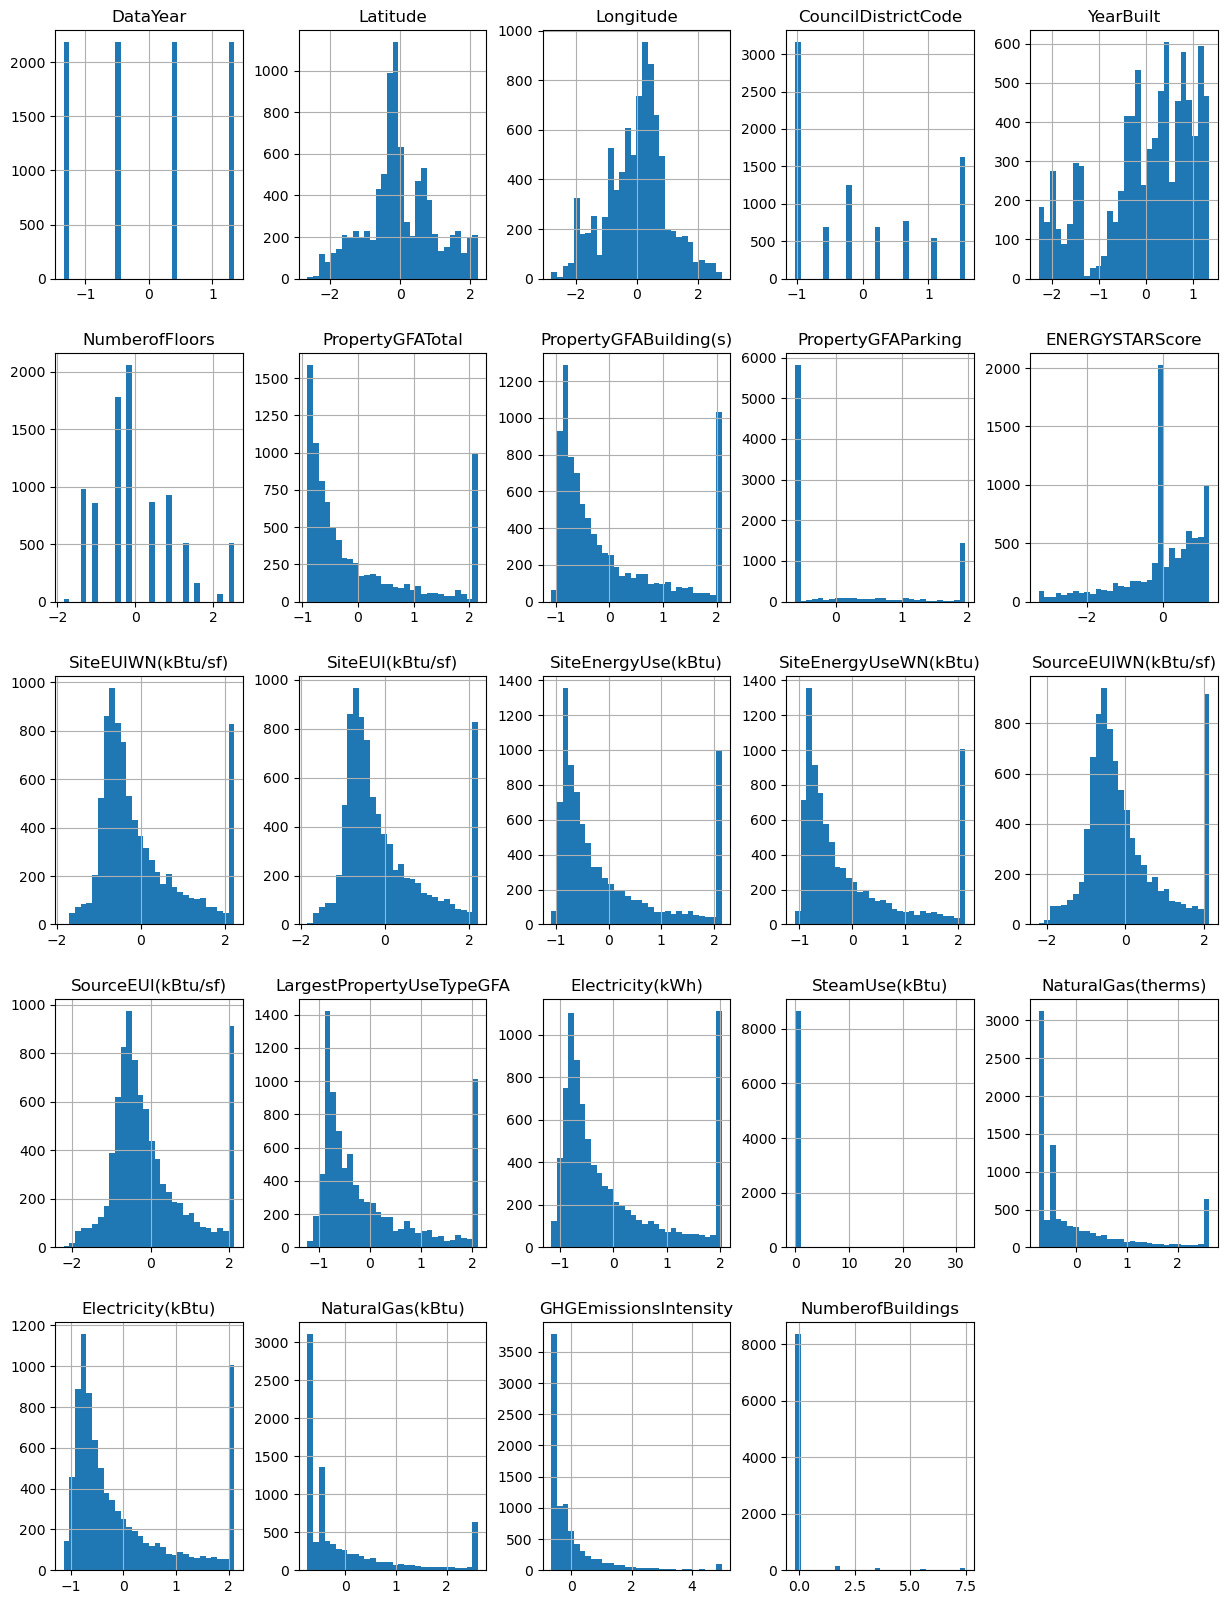

In [127]:
# Depois da centralização
X_1_centralizados.hist(figsize=(15, 20), bins=30)

### Centralização/Padronização das variáveis do segundo conjunto de dados

In [128]:
# Separamos as variáveis de entrada (features) e a variável alvo (target)
X_2 = df1_2.drop(columns='TotalGHGEmissions')  # Features
y_2 = df1_2['TotalGHGEmissions']              # Target

# Função para verificar se a coluna é numérica
def is_numeric(column):
    return pd.api.types.is_numeric_dtype(column)

# Centralizando e normalizando apenas as variáveis numéricas de entrada
scaler = StandardScaler()

# Aplicar centralização e normalização nas variáveis de entrada (features)
X_2_centralizados = X_2.copy()  

for column in X_2.columns:
    if is_numeric(X_2[column]):  # Verifica se a coluna é numérica
        # Centralizar e normalizar a coluna
        X_2_centralizados[column] = scaler.fit_transform(X_2[column].values.reshape(-1, 1)).flatten()

# Agora, você pode usar X_2_centralizados e y_2 (sem modificação) para treinar seu modelo
print(X_2_centralizados)
print(y_2)


      DataYear  Latitude  Longitude  CouncilDistrictCode  YearBuilt  \
0    -1.341528 -1.677769   2.416612            -0.599078  -0.417717   
1    -1.341528  0.680936   0.639673            -1.031397   0.803575   
2    -1.341528 -0.319576  -0.059098            -1.031397  -0.051329   
3    -1.341528 -0.336569  -0.108205            -1.031397  -1.974864   
4    -1.341528 -0.370140  -0.090017             1.562516  -1.486347   
...        ...       ...        ...                  ...        ...   
8742  1.341631 -0.164359  -0.093291             1.562516   1.322624   
8743  1.341631  1.321695   0.791723             0.697878   1.322624   
8744  1.341631 -0.947693  -2.112853            -1.031397   1.322624   
8745  1.341631 -0.063438   0.461070            -0.166759   1.200495   
8746  1.341631  1.665492   0.503993             0.697878   1.322624   

      NumberofFloors  PropertyGFATotal  PropertyGFABuilding(s)  \
0          -0.961345         -0.310806               -0.175027   
1           0.7

## Verificando os dados

In [129]:
X_1_centralizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DataYear                   8747 non-null   float64
 1   Latitude                   8747 non-null   float64
 2   Longitude                  8747 non-null   float64
 3   CouncilDistrictCode        8747 non-null   float64
 4   YearBuilt                  8747 non-null   float64
 5   NumberofFloors             8747 non-null   float64
 6   PropertyGFATotal           8747 non-null   float64
 7   PropertyGFABuilding(s)     8747 non-null   float64
 8   PropertyGFAParking         8747 non-null   float64
 9   ENERGYSTARScore            8747 non-null   float64
 10  SiteEUIWN(kBtu/sf)         8747 non-null   float64
 11  SiteEUI(kBtu/sf)           8747 non-null   float64
 12  SiteEnergyUse(kBtu)        8747 non-null   float64
 13  SiteEnergyUseWN(kBtu)      8747 non-null   float

In [130]:
X_2_centralizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 61 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   DataYear                                                            8747 non-null   float64
 1   Latitude                                                            8747 non-null   float64
 2   Longitude                                                           8747 non-null   float64
 3   CouncilDistrictCode                                                 8747 non-null   float64
 4   YearBuilt                                                           8747 non-null   float64
 5   NumberofFloors                                                      8747 non-null   float64
 6   PropertyGFATotal                                                    8747 non-null   float64
 7   PropertyGFABuil

## Escalonamento dos dados

Centralização e escalonamento juntos: Em muitos casos, você pode aplicar primeiro a centralização e depois o escalonamento.
A centralização prepara os dados para que cada variável tenha média 0, enquanto o escalonamento ajusta a dispersão para uma escala uniforme (geralmente de 0 a 1 ou com desvio padrão igual a 1).
Isso é comum quando você usa algoritmos baseados em distância (como KNN e SVM) ou redes neurais, onde as distâncias entre os pontos de dados são importantes.

### Escalonamento das variáveis do primeiro conjunto de dados

array([[<AxesSubplot:title={'center':'DataYear'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'CouncilDistrictCode'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'NumberofFloors'}>,
        <AxesSubplot:title={'center':'PropertyGFATotal'}>,
        <AxesSubplot:title={'center':'PropertyGFABuilding(s)'}>,
        <AxesSubplot:title={'center':'PropertyGFAParking'}>,
        <AxesSubplot:title={'center':'ENERGYSTARScore'}>],
       [<AxesSubplot:title={'center':'SiteEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUse(kBtu)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUseWN(kBtu)'}>,
        <AxesSubplot:title={'center':'SourceEUIWN(kBtu/sf)'}>],
       [<AxesSubplot:title={'center':'SourceEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'LargestPropertyUseTyp

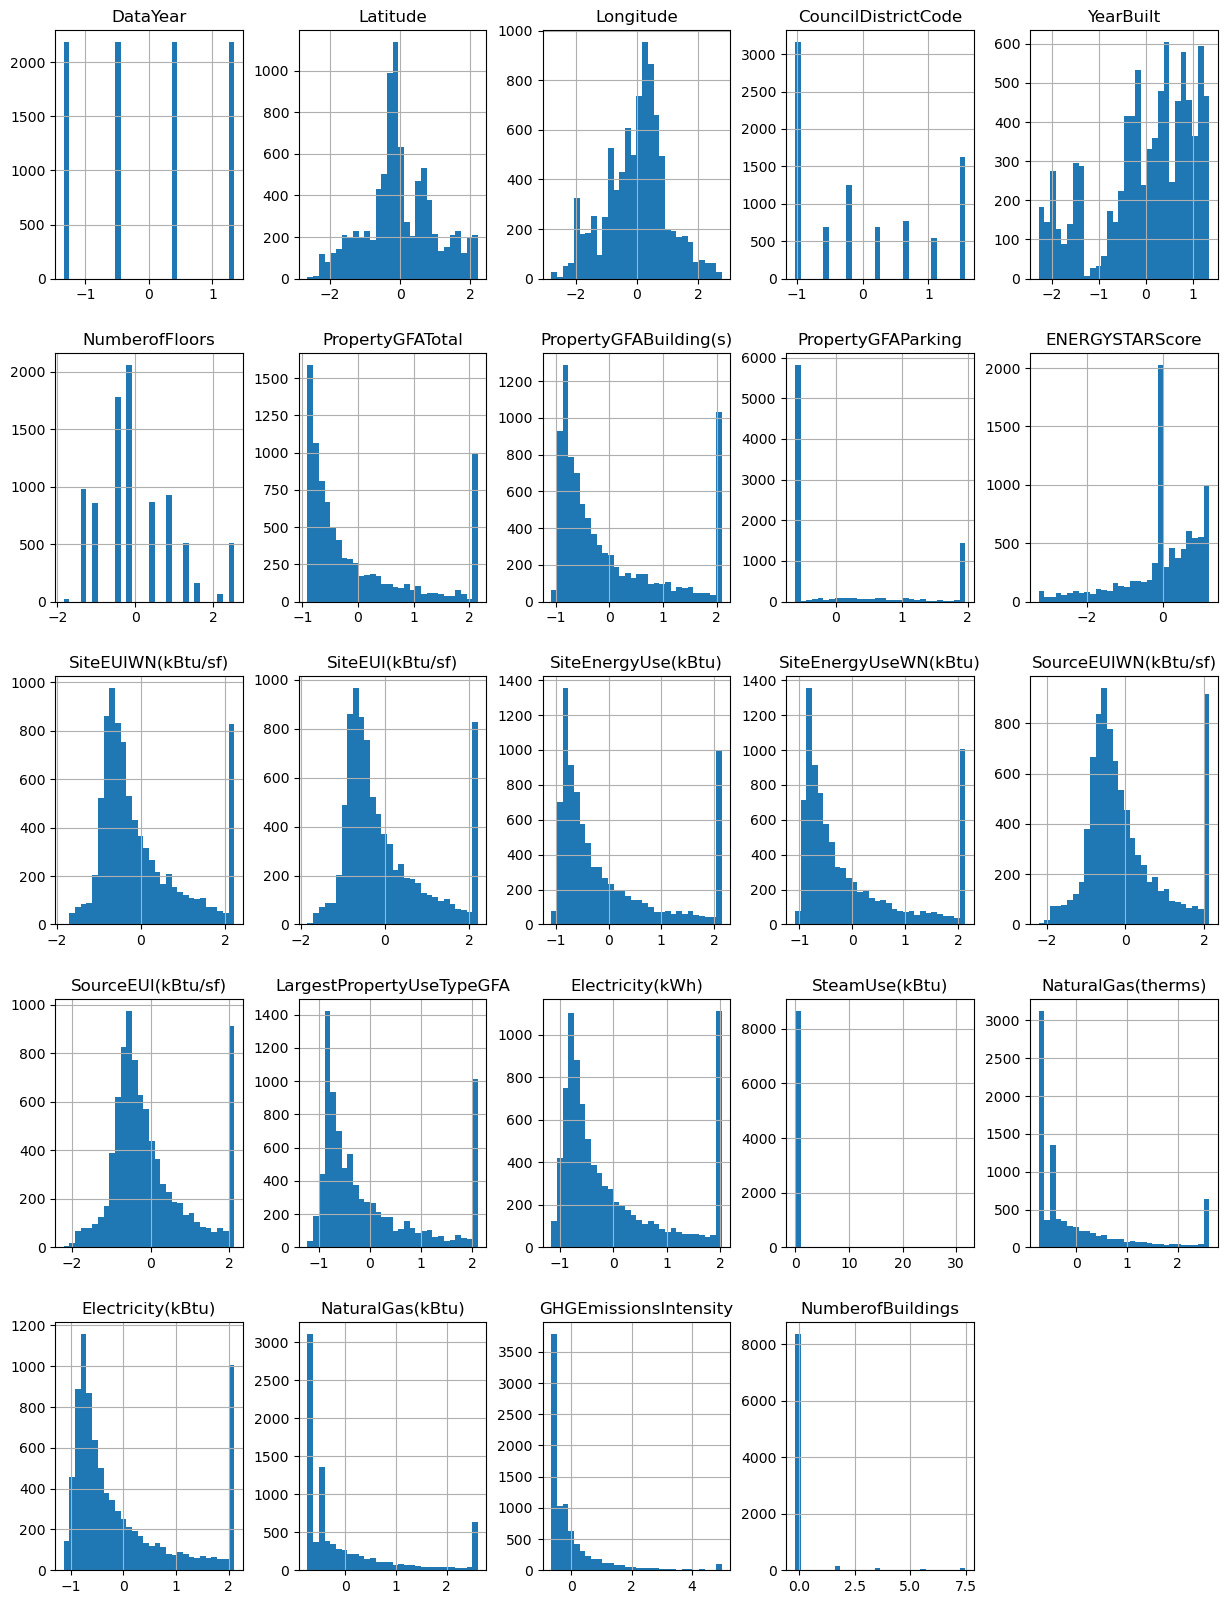

In [131]:
# Antes do escalonamento
X_1_centralizados.hist(figsize=(15, 20), bins=30)

In [132]:
# Aplicando a Normalização (Min-Max Scaling)**
min_max_scaler = MinMaxScaler()
dfX1_normalized = min_max_scaler.fit_transform(X_1_centralizados)

In [133]:
# Convertendo para DataFrame novamente para fácil visualização
dfX1_normalized = pd.DataFrame(dfX1_normalized, columns=X_1.columns)

# Exibindo os dados normalizados
#print("\nDados Normalizados (Min-Max Scaling):")
#print(dfX1_normalized)

array([[<AxesSubplot:title={'center':'DataYear'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'CouncilDistrictCode'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'NumberofFloors'}>,
        <AxesSubplot:title={'center':'PropertyGFATotal'}>,
        <AxesSubplot:title={'center':'PropertyGFABuilding(s)'}>,
        <AxesSubplot:title={'center':'PropertyGFAParking'}>,
        <AxesSubplot:title={'center':'ENERGYSTARScore'}>],
       [<AxesSubplot:title={'center':'SiteEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUse(kBtu)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUseWN(kBtu)'}>,
        <AxesSubplot:title={'center':'SourceEUIWN(kBtu/sf)'}>],
       [<AxesSubplot:title={'center':'SourceEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'LargestPropertyUseTyp

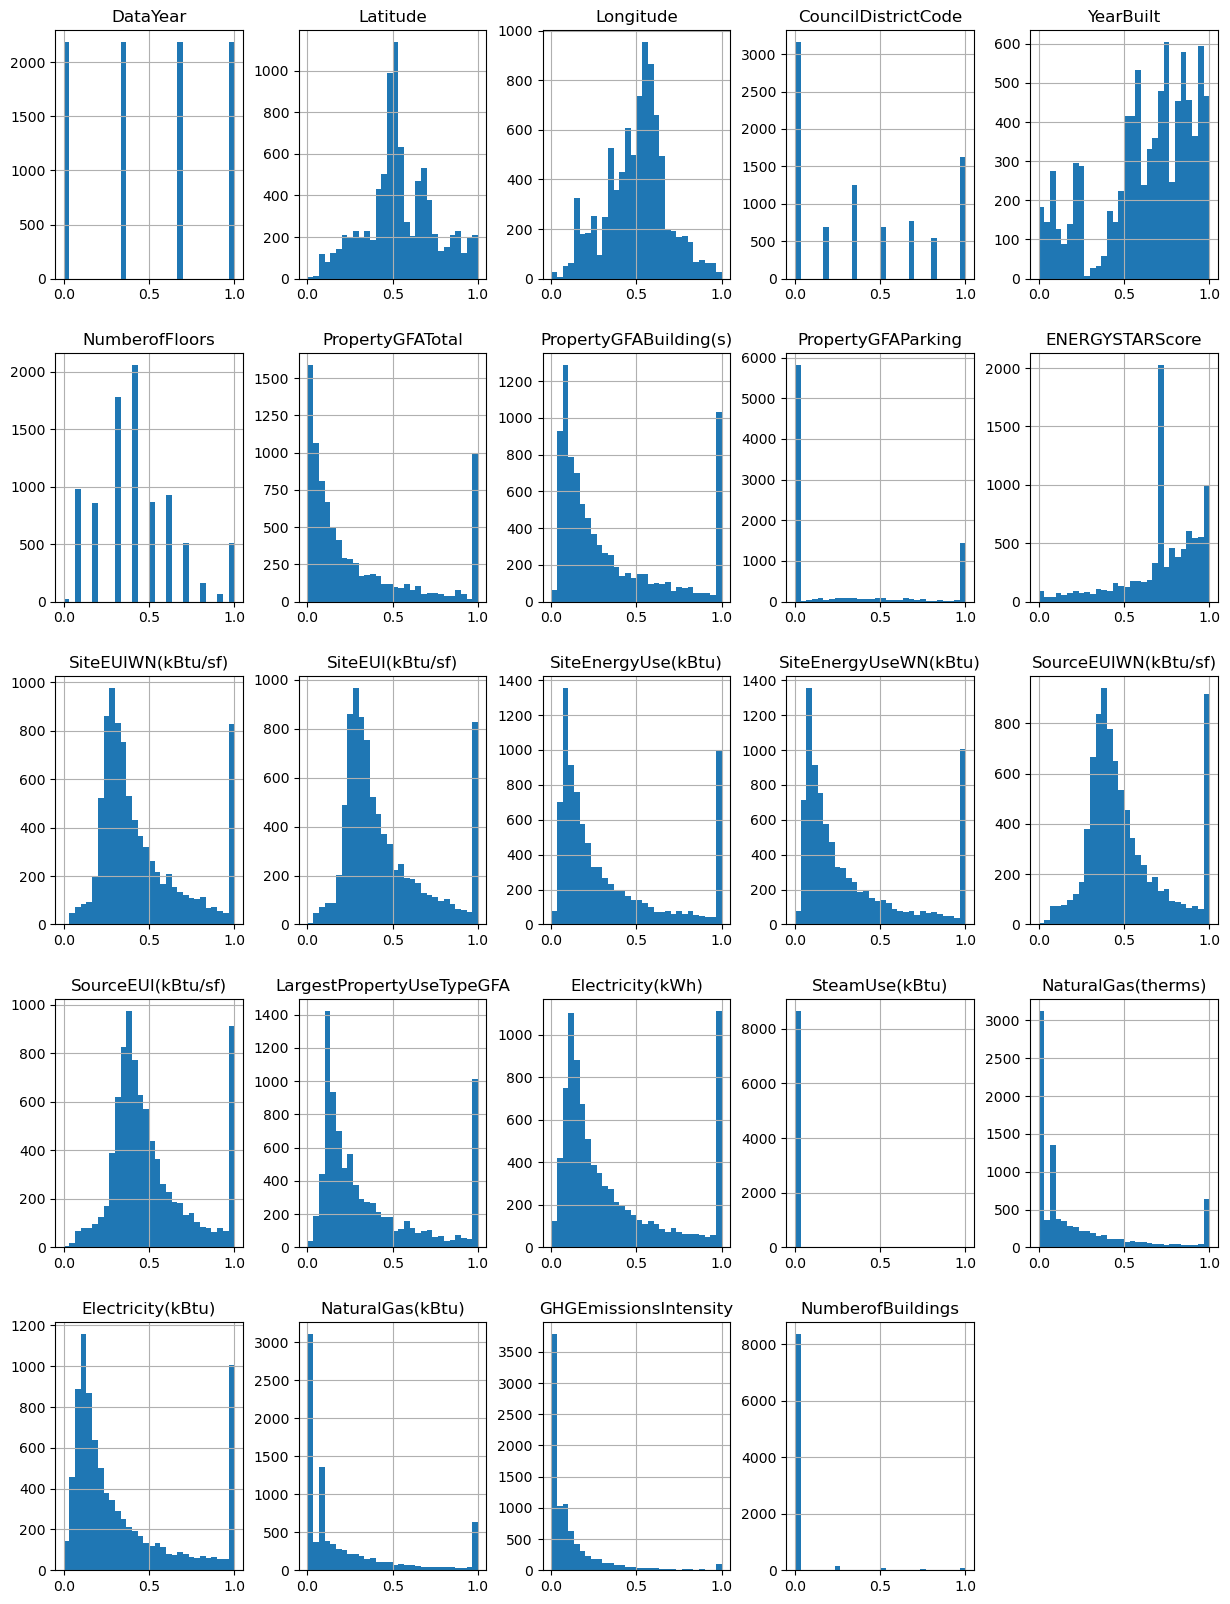

In [134]:
# Antes do escalonamento
dfX1_normalized.hist(figsize=(15, 20), bins=30)

### Escalonamento das variáveis do segundo conjunto de dados

array([[<AxesSubplot:title={'center':'DataYear'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'CouncilDistrictCode'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'NumberofFloors'}>,
        <AxesSubplot:title={'center':'PropertyGFATotal'}>,
        <AxesSubplot:title={'center':'PropertyGFABuilding(s)'}>],
       [<AxesSubplot:title={'center':'PropertyGFAParking'}>,
        <AxesSubplot:title={'center':'ENERGYSTARScore'}>,
        <AxesSubplot:title={'center':'SiteEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUse(kBtu)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUseWN(kBtu)'}>,
        <AxesSubplot:title={'center':'SourceEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SourceEUI(kBtu/sf)'}>],
       [<AxesSubplot:title={'center':'LargestPropertyUseType

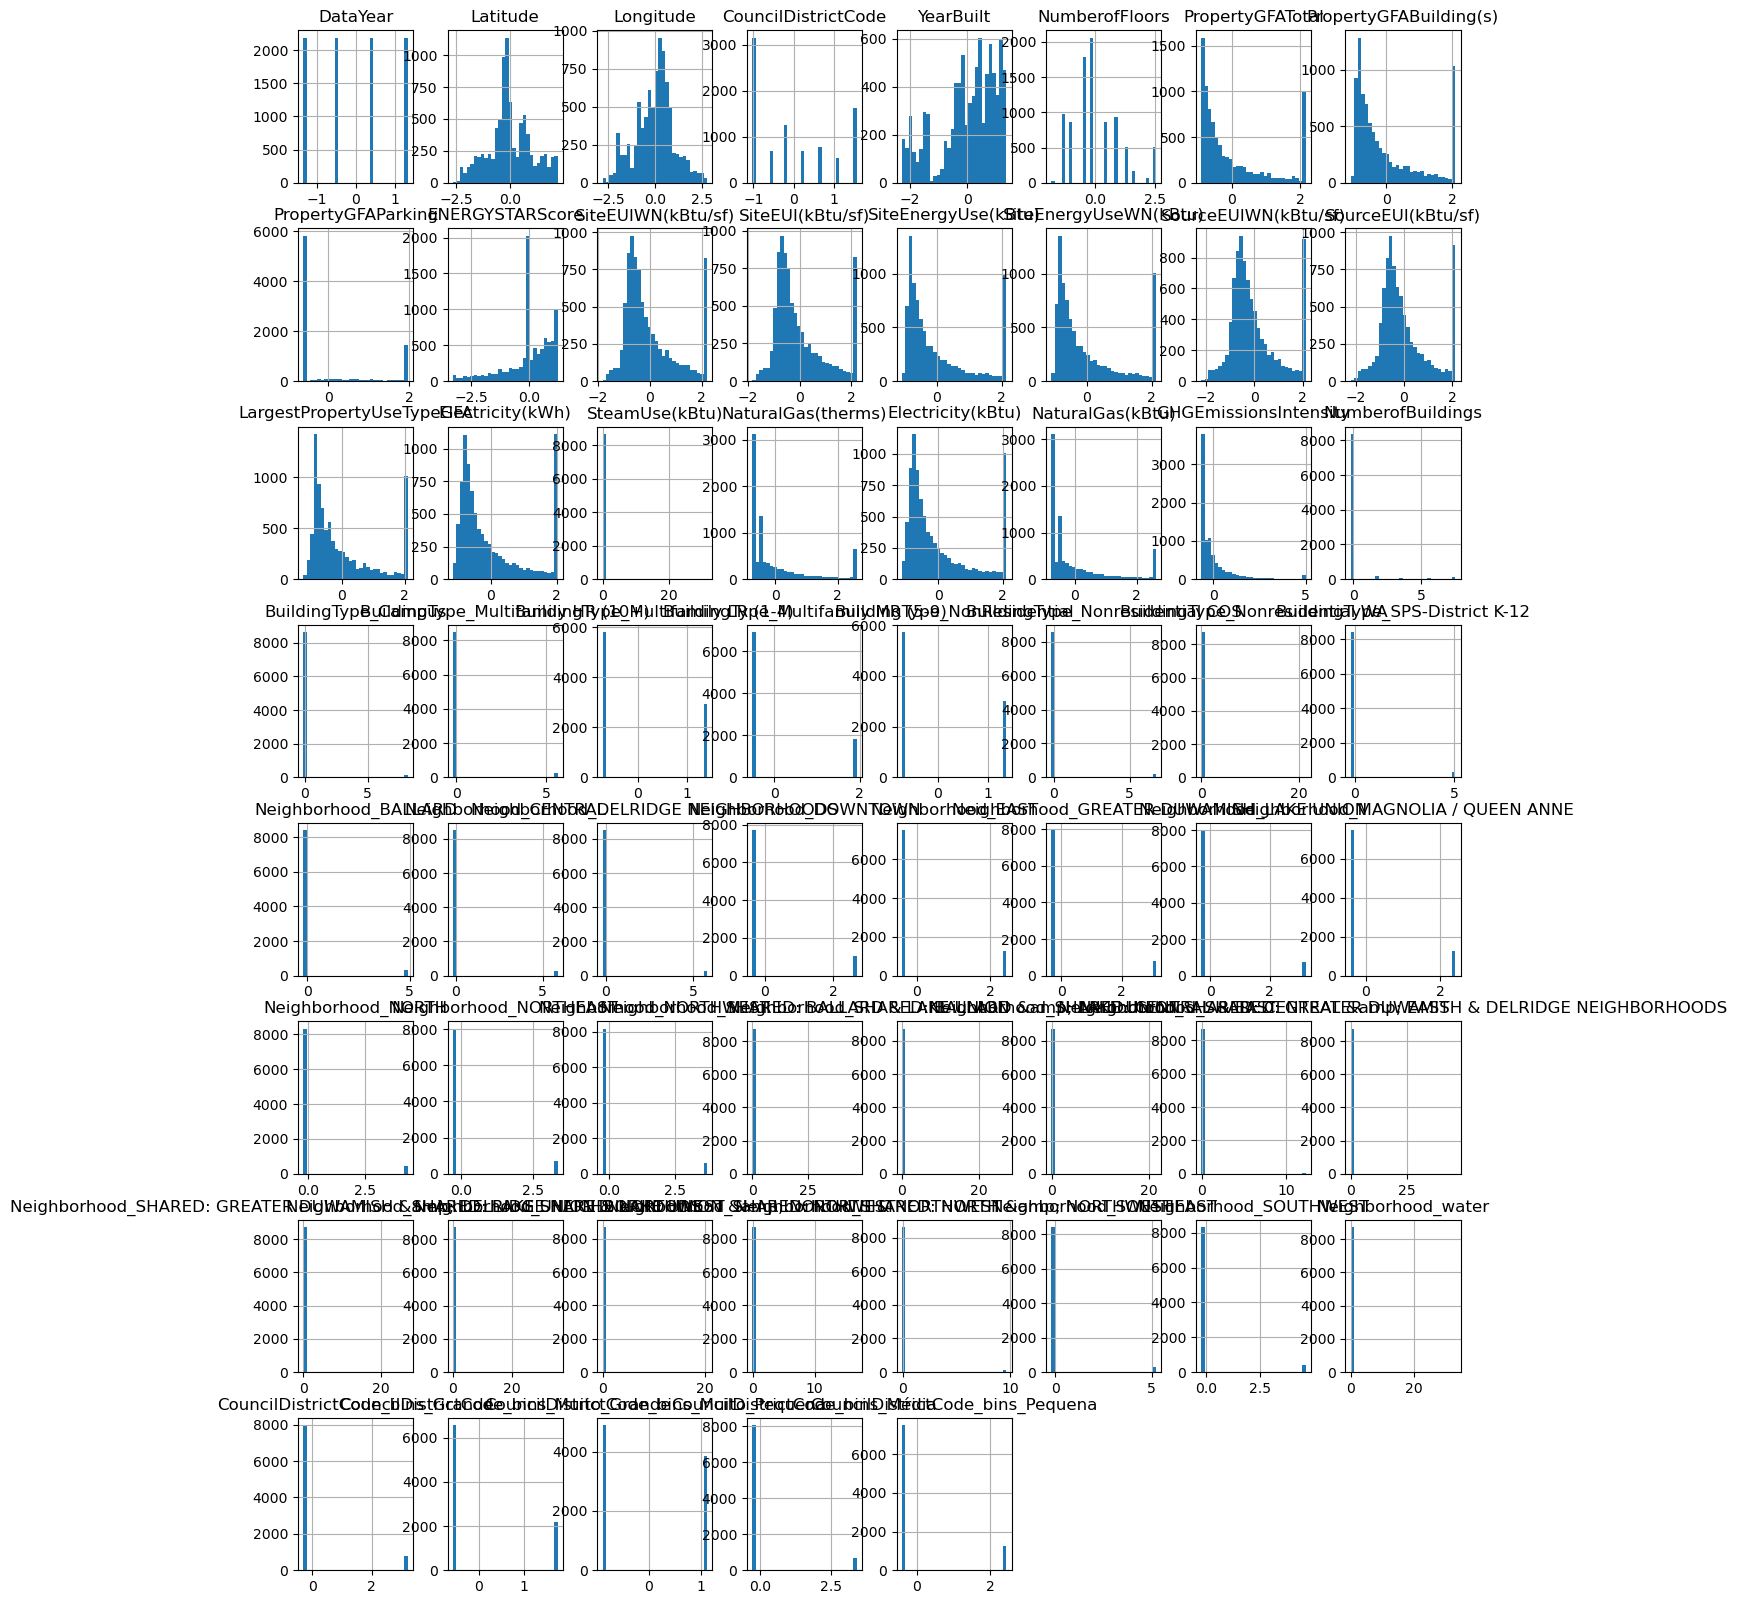

In [135]:
# Antes do escalonamento
X_2_centralizados.hist(figsize=(15, 20), bins=30)

In [136]:
# Aplicando a Normalização (Min-Max Scaling)**
min_max_scaler = MinMaxScaler()
dfX2_normalized = min_max_scaler.fit_transform(X_2_centralizados)

In [137]:
# Convertendo para DataFrame novamente para fácil visualização
dfX2_normalized = pd.DataFrame(dfX2_normalized, columns=X_2.columns)

# Exibindo os dados normalizados
#print("\nDados Normalizados (Min-Max Scaling):")
#print(dfX1_normalized)

array([[<AxesSubplot:title={'center':'DataYear'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'CouncilDistrictCode'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'NumberofFloors'}>,
        <AxesSubplot:title={'center':'PropertyGFATotal'}>,
        <AxesSubplot:title={'center':'PropertyGFABuilding(s)'}>],
       [<AxesSubplot:title={'center':'PropertyGFAParking'}>,
        <AxesSubplot:title={'center':'ENERGYSTARScore'}>,
        <AxesSubplot:title={'center':'SiteEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEUI(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUse(kBtu)'}>,
        <AxesSubplot:title={'center':'SiteEnergyUseWN(kBtu)'}>,
        <AxesSubplot:title={'center':'SourceEUIWN(kBtu/sf)'}>,
        <AxesSubplot:title={'center':'SourceEUI(kBtu/sf)'}>],
       [<AxesSubplot:title={'center':'LargestPropertyUseType

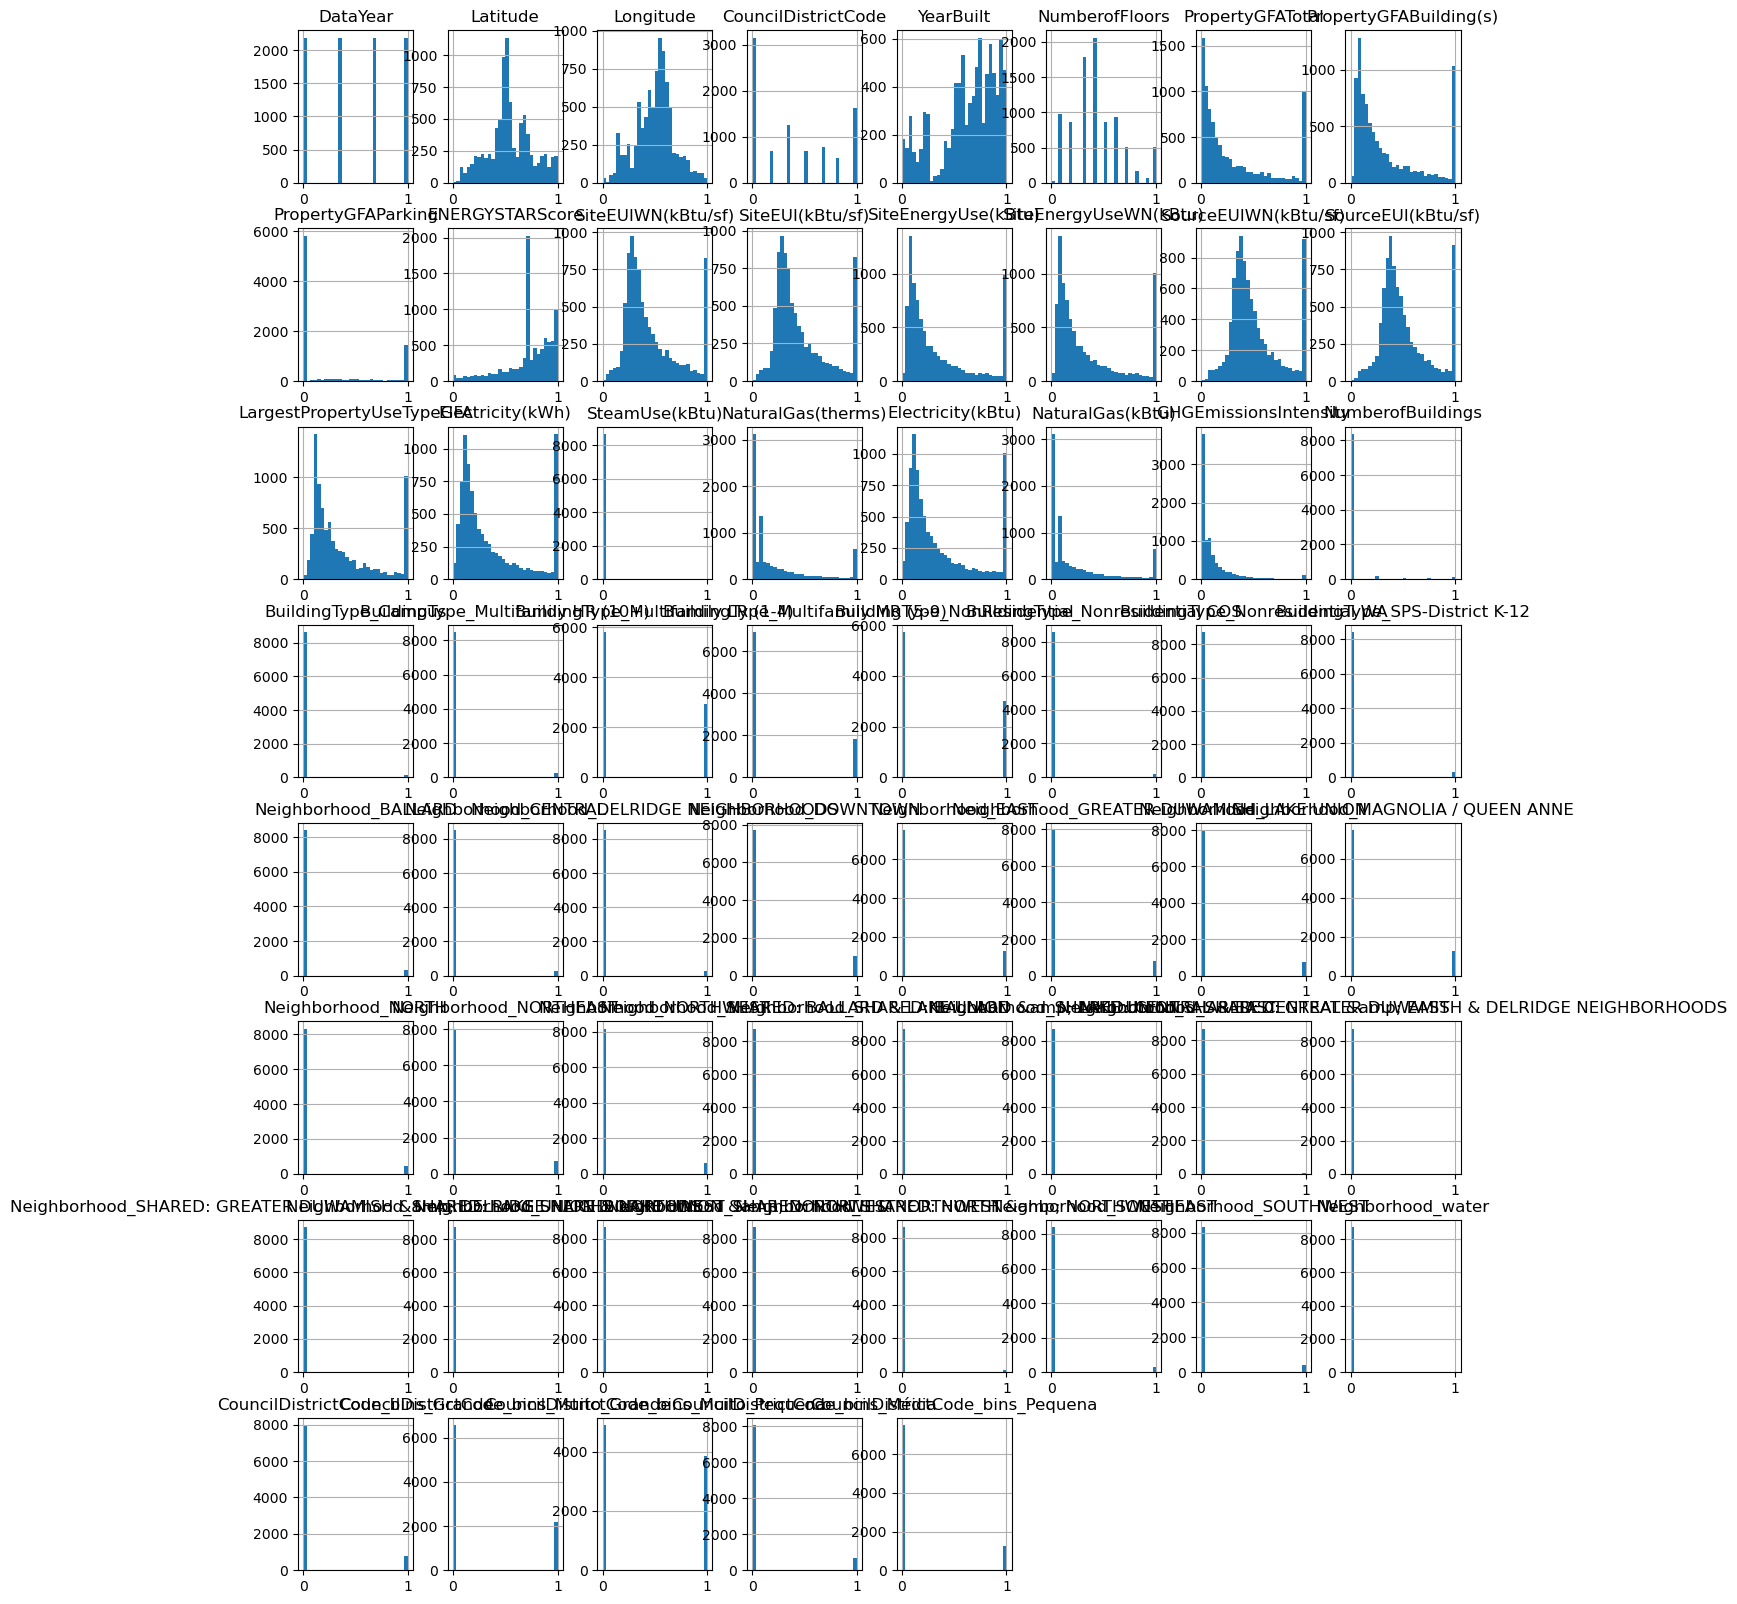

In [138]:
# Antes do escalonamento
dfX2_normalized.hist(figsize=(15, 20), bins=30)

# Tratamento da assimetria dos dados

importante: A transformação logarítmica não pode ser aplicada a valores zero ou negativos, pois o logaritmo de zero ou de um número negativo não é definido no conjunto dos números reais.

O np.log1p() é uma forma de prevenir problemas com valores zero, já que ele aplica o logaritmo a 1 + x, mas ainda assim valores negativos podem gerar NaN dependendo do contexto.

# Tratamento da assimetria dos dados para o primeiro conjunto de dados

In [139]:
# Calcular a assimetria das variáveis
skewness_values = dfX1_normalized.skew()

# Exibir o nome das variáveis e seus valores de assimetria
for column, skew_value in skewness_values.items():
    print(f"Variável: {column}, Assimetria: {skew_value}")

Variável: DataYear, Assimetria: 0.00014317637647522644
Variável: Latitude, Assimetria: 0.07783052970689802
Variável: Longitude, Assimetria: -0.11818440187893746
Variável: CouncilDistrictCode, Assimetria: 0.4185529752000573
Variável: YearBuilt, Assimetria: -0.7189614287257534
Variável: NumberofFloors, Assimetria: 0.8239818319727449
Variável: PropertyGFATotal, Assimetria: 1.1868285035361756
Variável: PropertyGFABuilding(s), Assimetria: 1.0924505603573929
Variável: PropertyGFAParking, Assimetria: 1.2214357858475824
Variável: ENERGYSTARScore, Assimetria: -1.235947948571076
Variável: SiteEUIWN(kBtu/sf), Assimetria: 1.0383678443166369
Variável: SiteEUI(kBtu/sf), Assimetria: 1.0355223013629518
Variável: SiteEnergyUse(kBtu), Assimetria: 1.1599237870893087
Variável: SiteEnergyUseWN(kBtu), Assimetria: 1.1575243121671768
Variável: SourceEUIWN(kBtu/sf), Assimetria: 0.8826172845488409
Variável: SourceEUI(kBtu/sf), Assimetria: 0.8755575012335207
Variável: LargestPropertyUseTypeGFA, Assimetria: 1.098

- Se o valor for próximo de 0, a distribuição é simétrica.
- Se for positivo, a distribuição é assimétrica à direita (cauda longa à direita).
- Se for negativo, a distribuição é assimétrica à esquerda (cauda longa à esquerda).

Transformação Logarítmica (para dados assimétricos à direita):
Quando os dados têm caudas longas à direita (valores muito altos), a transformação logarítmica pode ser útil.

In [140]:
# cópia para o novo dataset transformado
df1_log = dfX1_normalized.copy()

# Aplicar np.log1p apenas nas colunas numéricas
for column in df1_log.select_dtypes(include=[np.number]).columns:
    df1_log[column] = np.log1p(df1_log[column])

# Verificar os primeiros registros para confirmar
print(df1_log.head())

   DataYear  Latitude  Longitude  CouncilDistrictCode  YearBuilt  \
0       0.0  0.181078   0.660324             0.154151   0.413833   
1       0.0  0.520856   0.480220             0.000000   0.614504   
2       0.0  0.390527   0.399439             0.000000   0.478372   
3       0.0  0.388160   0.393509             0.000000   0.080689   
4       0.0  0.383467   0.395710             0.693147   0.197610   

   NumberofFloors  PropertyGFATotal  PropertyGFABuilding(s)  \
0        0.182322          0.177847                0.251821   
1        0.470004          0.313733                0.260896   
2        0.405465          0.314224                0.405885   
3        0.587787          0.192012                0.267953   
4        0.182322          0.161163                0.232780   

   PropertyGFAParking  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  SiteEUI(kBtu/sf)  \
0            0.000000         0.646627            0.254708          0.250056   
1            0.693147         0.672738            0.

In [141]:
df1_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DataYear                   8747 non-null   float64
 1   Latitude                   8747 non-null   float64
 2   Longitude                  8747 non-null   float64
 3   CouncilDistrictCode        8747 non-null   float64
 4   YearBuilt                  8747 non-null   float64
 5   NumberofFloors             8747 non-null   float64
 6   PropertyGFATotal           8747 non-null   float64
 7   PropertyGFABuilding(s)     8747 non-null   float64
 8   PropertyGFAParking         8747 non-null   float64
 9   ENERGYSTARScore            8747 non-null   float64
 10  SiteEUIWN(kBtu/sf)         8747 non-null   float64
 11  SiteEUI(kBtu/sf)           8747 non-null   float64
 12  SiteEnergyUse(kBtu)        8747 non-null   float64
 13  SiteEnergyUseWN(kBtu)      8747 non-null   float

In [142]:
# Calcular a assimetria das variáveis
skewness_values = df1_log.skew()

# Exibir o nome das variáveis e seus valores de assimetria
for column, skew_value in skewness_values.items():
    print(f"Variável: {column}, Assimetria: {skew_value}")

Variável: DataYear, Assimetria: -0.24529956571616693
Variável: Latitude, Assimetria: -0.29653194338501027
Variável: Longitude, Assimetria: -0.4778234630489693
Variável: CouncilDistrictCode, Assimetria: 0.22911158773120124
Variável: YearBuilt, Assimetria: -0.9947531474760359
Variável: NumberofFloors, Assimetria: 0.4287313157567424
Variável: PropertyGFATotal, Assimetria: 0.971334788865324
Variável: PropertyGFABuilding(s), Assimetria: 0.8910172246768675
Variável: PropertyGFAParking, Assimetria: 1.125381985243509
Variável: ENERGYSTARScore, Assimetria: -1.6305640187221542
Variável: SiteEUIWN(kBtu/sf), Assimetria: 0.7949034646124058
Variável: SiteEUI(kBtu/sf), Assimetria: 0.7917968765351416
Variável: SiteEnergyUse(kBtu), Assimetria: 0.9564422592597952
Variável: SiteEnergyUseWN(kBtu), Assimetria: 0.9550582161936811
Variável: SourceEUIWN(kBtu/sf), Assimetria: 0.588804944152732
Variável: SourceEUI(kBtu/sf), Assimetria: 0.5817229887082437
Variável: LargestPropertyUseTypeGFA, Assimetria: 0.896793

# Tratamento da assimetria dos dados para o segundo conjunto de dados

In [143]:
# Calcular a assimetria das variáveis
skewness_values = dfX2_normalized.skew()

# Exibir o nome das variáveis e seus valores de assimetria
for column, skew_value in skewness_values.items():
    print(f"Variável: {column}, Assimetria: {skew_value}")

Variável: DataYear, Assimetria: 0.00014317637647522644
Variável: Latitude, Assimetria: 0.07783052970689802
Variável: Longitude, Assimetria: -0.11818440187893746
Variável: CouncilDistrictCode, Assimetria: 0.4185529752000573
Variável: YearBuilt, Assimetria: -0.7189614287257534
Variável: NumberofFloors, Assimetria: 0.8239818319727449
Variável: PropertyGFATotal, Assimetria: 1.1868285035361756
Variável: PropertyGFABuilding(s), Assimetria: 1.0924505603573929
Variável: PropertyGFAParking, Assimetria: 1.2214357858475824
Variável: ENERGYSTARScore, Assimetria: -1.235947948571076
Variável: SiteEUIWN(kBtu/sf), Assimetria: 1.0383678443166369
Variável: SiteEUI(kBtu/sf), Assimetria: 1.0355223013629518
Variável: SiteEnergyUse(kBtu), Assimetria: 1.1599237870893087
Variável: SiteEnergyUseWN(kBtu), Assimetria: 1.1575243121671768
Variável: SourceEUIWN(kBtu/sf), Assimetria: 0.8826172845488409
Variável: SourceEUI(kBtu/sf), Assimetria: 0.8755575012335207
Variável: LargestPropertyUseTypeGFA, Assimetria: 1.098

In [144]:
# cópia para o novo dataset transformado
df2_log = dfX2_normalized.copy()

# Aplicar np.log1p apenas nas colunas numéricas
for column in df2_log.select_dtypes(include=[np.number]).columns:
    df2_log[column] = np.log1p(df2_log[column])

# Verificar os primeiros registros para confirmar
print(df2_log.head())

   DataYear  Latitude  Longitude  CouncilDistrictCode  YearBuilt  \
0       0.0  0.181078   0.660324             0.154151   0.413833   
1       0.0  0.520856   0.480220             0.000000   0.614504   
2       0.0  0.390527   0.399439             0.000000   0.478372   
3       0.0  0.388160   0.393509             0.000000   0.080689   
4       0.0  0.383467   0.395710             0.693147   0.197610   

   NumberofFloors  PropertyGFATotal  PropertyGFABuilding(s)  \
0        0.182322          0.177847                0.251821   
1        0.470004          0.313733                0.260896   
2        0.405465          0.314224                0.405885   
3        0.587787          0.192012                0.267953   
4        0.182322          0.161163                0.232780   

   PropertyGFAParking  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  SiteEUI(kBtu/sf)  \
0            0.000000         0.646627            0.254708          0.250056   
1            0.693147         0.672738            0.

In [145]:
# Calcular a assimetria das variáveis
skewness_values = df2_log.skew()

# Exibir o nome das variáveis e seus valores de assimetria
for column, skew_value in skewness_values.items():
    print(f"Variável: {column}, Assimetria: {skew_value}")

Variável: DataYear, Assimetria: -0.24529956571616693
Variável: Latitude, Assimetria: -0.29653194338501027
Variável: Longitude, Assimetria: -0.4778234630489693
Variável: CouncilDistrictCode, Assimetria: 0.22911158773120124
Variável: YearBuilt, Assimetria: -0.9947531474760359
Variável: NumberofFloors, Assimetria: 0.4287313157567424
Variável: PropertyGFATotal, Assimetria: 0.971334788865324
Variável: PropertyGFABuilding(s), Assimetria: 0.8910172246768675
Variável: PropertyGFAParking, Assimetria: 1.125381985243509
Variável: ENERGYSTARScore, Assimetria: -1.6305640187221542
Variável: SiteEUIWN(kBtu/sf), Assimetria: 0.7949034646124058
Variável: SiteEUI(kBtu/sf), Assimetria: 0.7917968765351416
Variável: SiteEnergyUse(kBtu), Assimetria: 0.9564422592597952
Variável: SiteEnergyUseWN(kBtu), Assimetria: 0.9550582161936811
Variável: SourceEUIWN(kBtu/sf), Assimetria: 0.588804944152732
Variável: SourceEUI(kBtu/sf), Assimetria: 0.5817229887082437
Variável: LargestPropertyUseTypeGFA, Assimetria: 0.896793

## Verificando a Multi-colinearidade:

In [24]:
correlation_matrix = df1_1.corr()


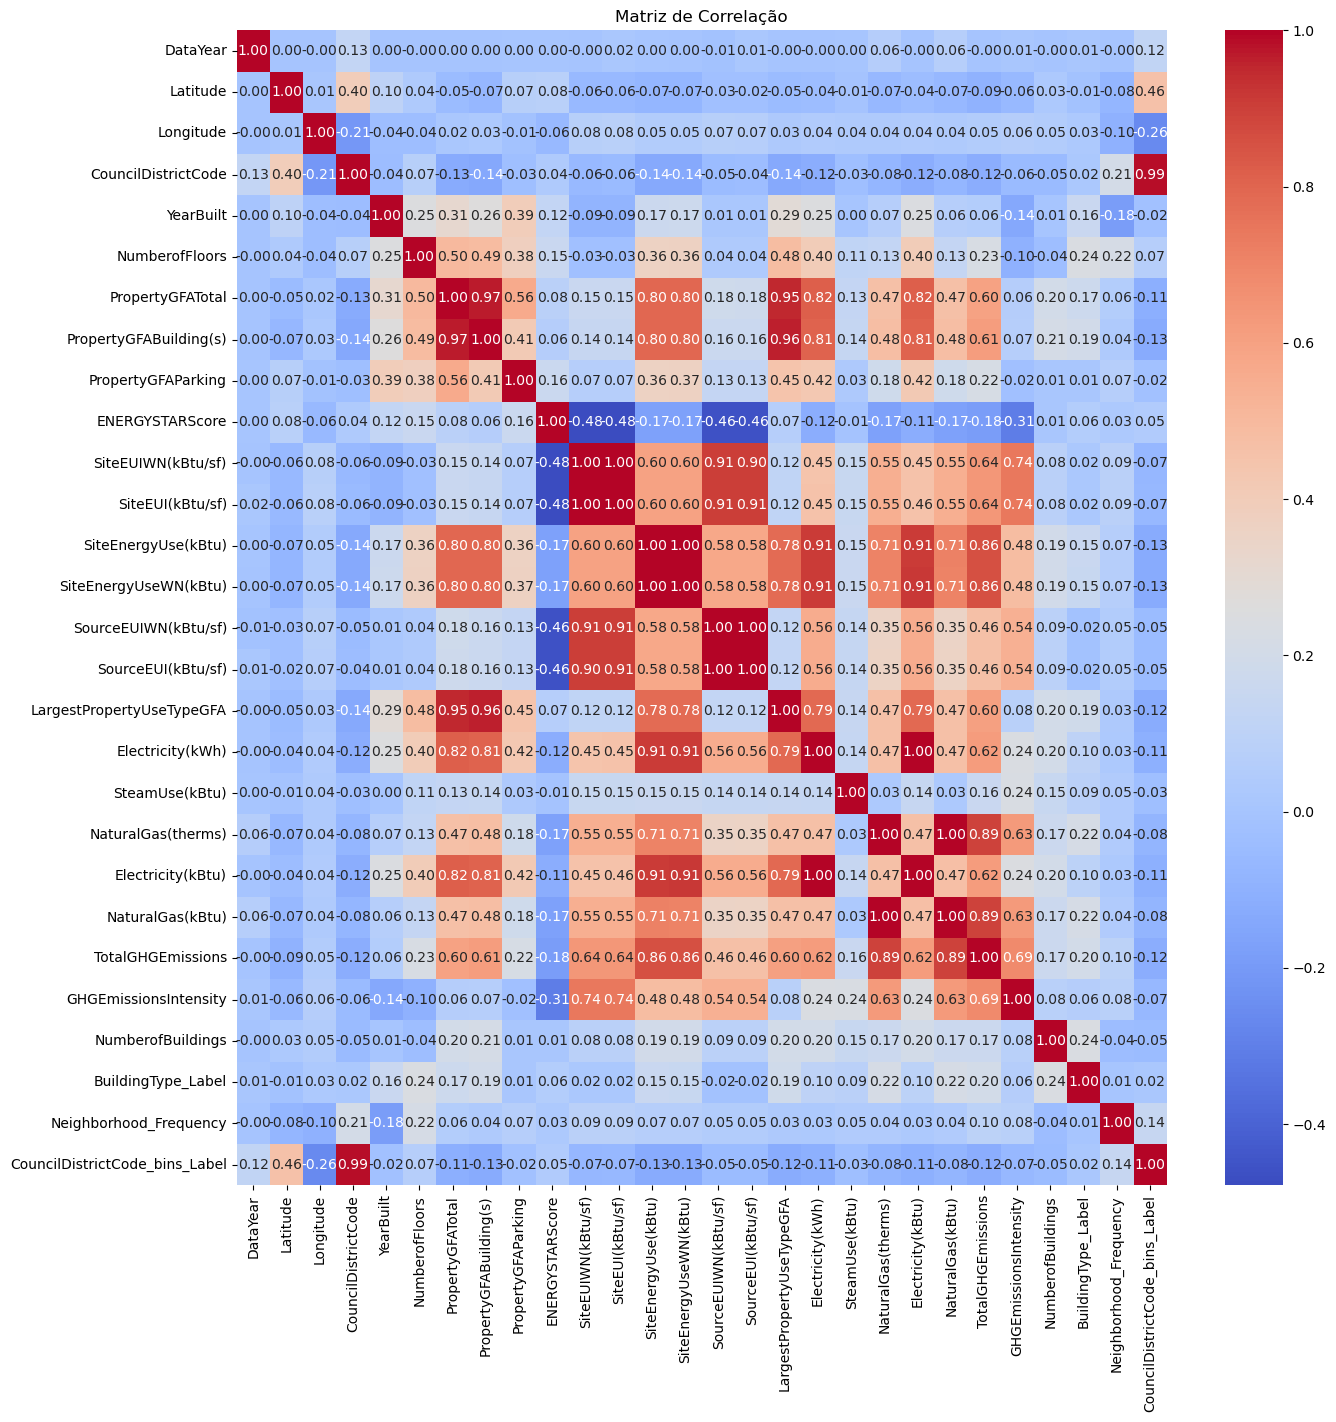

In [25]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [26]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DataYear                        8747 non-null   int64  
 1   Latitude                        8747 non-null   float64
 2   Longitude                       8747 non-null   float64
 3   CouncilDistrictCode             8747 non-null   int64  
 4   YearBuilt                       8747 non-null   int64  
 5   NumberofFloors                  8747 non-null   int64  
 6   PropertyGFATotal                8747 non-null   float64
 7   PropertyGFABuilding(s)          8747 non-null   float64
 8   PropertyGFAParking              8747 non-null   float64
 9   ENERGYSTARScore                 8747 non-null   float64
 10  SiteEUIWN(kBtu/sf)              8747 non-null   float64
 11  SiteEUI(kBtu/sf)                8747 non-null   float64
 12  SiteEnergyUse(kBtu)             87

# Redução de variáveis
A ideia dessa seção é realizar 

In [148]:
df1_log.shape

(8747, 24)

In [149]:
# Unir pelo eixo das colunas (axis=1)
df_correlacao = pd.concat([df1_log, y_1], axis=1)

In [151]:
df_correlacao.head()

,DataYear,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,NumberofBuildings,TotalGHGEmissions
0,0.0,0.181078,0.660324,0.154151,0.413833,0.182322,0.177847,0.251821,0.000000,0.646627,0.254708,0.250056,0.168970,0.168105,0.244770,0.241193,0.301924,0.141193,0.0,0.176140,0.133917,0.176090,0.090597,0.0,49.300
1,0.0,0.520856,0.480220,0.000000,0.614504,0.470004,0.313733,0.260896,0.693147,0.672738,0.412473,0.412880,0.312678,0.316936,0.444031,0.443721,0.344335,0.331930,0.0,0.252791,0.315057,0.252710,0.138637,0.0,79.200
2,0.0,0.390527,0.399439,0.000000,0.478372,0.405465,0.314224,0.405885,0.000000,0.569666,0.427031,0.428826,0.671879,0.682059,0.567508,0.569276,0.498706,0.693147,0.0,0.000000,0.693147,0.000000,0.060625,0.0,54.200
3,0.0,0.388160,0.393509,0.000000,0.080689,0.587787,0.192012,0.267953,0.000000,0.547730,0.349051,0.349406,0.218859,0.221978,0.469706,0.469382,0.248922,0.348830,0.0,0.000000,0.331187,0.000000,0.019211,0.0,13.800
4,0.0,0.383467,0.395710,0.693147,0.197610,0.182322,0.161163,0.232780,0.000000,0.547730,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.111618,0.616562,0.0,0.693147,0.588256,0.693147,0.693147,0.0,211.494


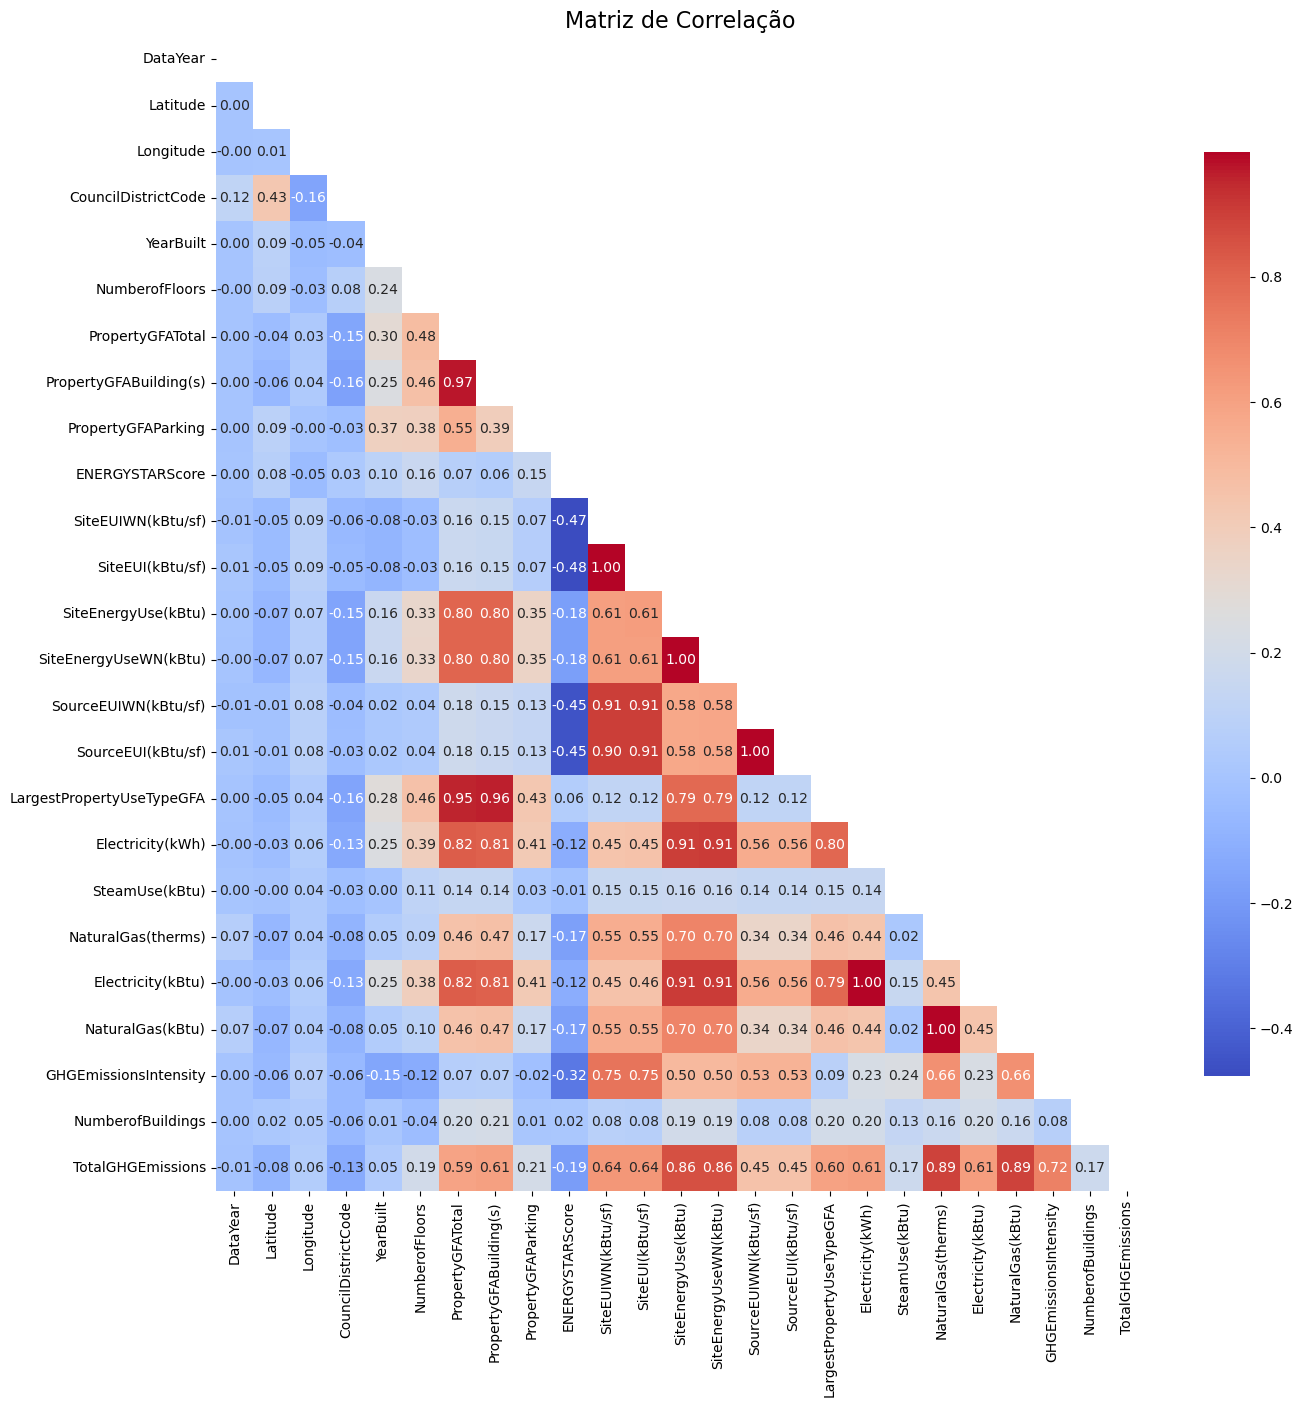

In [154]:
# Supondo que df seja o DataFrame
correlation_matrix = df_correlacao.corr()

# Criar uma máscara para a parte superior da matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar o tamanho do gráfico
plt.figure(figsize=(15, 15))

# Criar o mapa de calor com a máscara
sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True,  # Mostrar os valores
            fmt=".2f",   # Formato dos números
            cmap="coolwarm",  # Escolha de cores
            cbar_kws={"shrink": 0.8})  # Personalização da barra de cores

# Título opcional
plt.title("Matriz de Correlação", fontsize=16)

# Exibir o gráfico
plt.show()

In [152]:
# Calculando a correlação
correlation_matrix = df_correlacao.corr()
print(correlation_matrix["TotalGHGEmissions"].sort_values(ascending=False))

TotalGHGEmissions            1.000000
NaturalGas(kBtu)             0.892590
NaturalGas(therms)           0.891115
SiteEnergyUse(kBtu)          0.858149
SiteEnergyUseWN(kBtu)        0.856596
GHGEmissionsIntensity        0.715090
SiteEUIWN(kBtu/sf)           0.638421
SiteEUI(kBtu/sf)             0.638342
Electricity(kBtu)            0.613834
Electricity(kWh)             0.609384
PropertyGFABuilding(s)       0.606732
LargestPropertyUseTypeGFA    0.597428
PropertyGFATotal             0.594425
SourceEUIWN(kBtu/sf)         0.454667
SourceEUI(kBtu/sf)           0.454457
PropertyGFAParking           0.209621
NumberofFloors               0.194407
NumberofBuildings            0.171571
SteamUse(kBtu)               0.170857
Longitude                    0.056129
YearBuilt                    0.045119
DataYear                    -0.006949
Latitude                    -0.081386
CouncilDistrictCode         -0.128126
ENERGYSTARScore             -0.185763
Name: TotalGHGEmissions, dtype: float64


TotalGHGEmissions            1.000000
NaturalGas(kBtu)             0.892590
NaturalGas(therms)           0.891115
SiteEnergyUse(kBtu)          0.858149
SiteEnergyUseWN(kBtu)        0.856596
GHGEmissionsIntensity        0.715090
SiteEUIWN(kBtu/sf)           0.638421
SiteEUI(kBtu/sf)             0.638342
Electricity(kBtu)            0.613834
Electricity(kWh)             0.609384
PropertyGFABuilding(s)       0.606732
LargestPropertyUseTypeGFA    0.597428
PropertyGFATotal             0.594425
SourceEUIWN(kBtu/sf)         0.454667
SourceEUI(kBtu/sf)           0.454457
PropertyGFAParking           0.209621

In [ ]:
TotalGHGEmissions            1.000000
NaturalGas(kBtu)             0.892590
SiteEnergyUse(kBtu)          0.858149
SiteEUIWN(kBtu/sf)           0.638421
Electricity(kBtu)            0.613834
PropertyGFABuilding(s)       0.606732
LargestPropertyUseTypeGFA    0.597428
PropertyGFATotal             0.594425
SourceEUIWN(kBtu/sf)         0.454667
PropertyGFAParking           0.209621

In [160]:
df_correlacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DataYear                   8747 non-null   float64
 1   Latitude                   8747 non-null   float64
 2   Longitude                  8747 non-null   float64
 3   CouncilDistrictCode        8747 non-null   float64
 4   YearBuilt                  8747 non-null   float64
 5   NumberofFloors             8747 non-null   float64
 6   PropertyGFATotal           8747 non-null   float64
 7   PropertyGFABuilding(s)     8747 non-null   float64
 8   PropertyGFAParking         8747 non-null   float64
 9   ENERGYSTARScore            8747 non-null   float64
 10  SiteEUIWN(kBtu/sf)         8747 non-null   float64
 11  SiteEUI(kBtu/sf)           8747 non-null   float64
 12  SiteEnergyUse(kBtu)        8747 non-null   float64
 13  SiteEnergyUseWN(kBtu)      8747 non-null   float

In [158]:
# Lista das variáveis que deseja manter
variaveis_para_manter = [
    "TotalGHGEmissions",
    "NaturalGas(kBtu)",
    "SiteEnergyUse(kBtu)",
    "SiteEUIWN(kBtu/sf)",
    "Electricity(kBtu)",
    "PropertyGFABuilding(s)",
    "LargestPropertyUseTypeGFA",
    "PropertyGFATotal",
    "SourceEUIWN(kBtu/sf)",
    "PropertyGFAParking"
]


In [163]:
# Filtrando o DataFrame para manter apenas as colunas desejadas
df3_log = df_correlacao[variaveis_para_manter]

# Exibindo o DataFrame filtrado
df3_log.head()

,TotalGHGEmissions,NaturalGas(kBtu),SiteEnergyUse(kBtu),SiteEUIWN(kBtu/sf),Electricity(kBtu),PropertyGFABuilding(s),LargestPropertyUseTypeGFA,PropertyGFATotal,SourceEUIWN(kBtu/sf),PropertyGFAParking
0,49.300,0.176090,0.168970,0.254708,0.133917,0.251821,0.301924,0.177847,0.244770,0.000000
1,79.200,0.252710,0.312678,0.412473,0.315057,0.260896,0.344335,0.313733,0.444031,0.693147
2,54.200,0.000000,0.671879,0.427031,0.693147,0.405885,0.498706,0.314224,0.567508,0.000000
3,13.800,0.000000,0.218859,0.349051,0.331187,0.267953,0.248922,0.192012,0.469706,0.000000
4,211.494,0.693147,0.693147,0.693147,0.588256,0.232780,0.111618,0.161163,0.693147,0.000000


In [164]:
# Separando o cojunto de dados
X_3 = df3_log.drop(columns='TotalGHGEmissions', axis=1)
y_3 = df3_log.TotalGHGEmissions

## Criação de Novas Features

In [195]:
df4_log = df3_log.copy()

Proporções: Calculamos as proporções entre áreas de construção, estacionamento, e uso maior.
Interações: Calculamos a interação entre consumo de energia e a eficiência energética.
Transformações matemáticas: Aplicamos o logaritmo nas variáveis de gás e eletricidade, além de adicionar a variável quadrática para gás.

# 1. Relações Proporcionais

Crie relações proporcionais entre as variáveis existentes. Isso pode revelar padrões ocultos. Exemplos:

- **Proporção entre áreas de construção e estacionamento**:
  
  \[
  \text{ProporçãoEstacionamento} = \frac{\text{PropertyGFAParking}}{\text{PropertyGFATotal}}
  \]

- **Consumo de energia por área construída**:
  
  \[
  \text{ConsumoEnergiaTotalPorÁrea} = \frac{\text{SiteEnergyUse(kBtu)}}{\text{PropertyGFATotal}}
  \]

- **Proporção da maior área de uso com a área total**:
  
  \[
  \text{ProporçãoMaiorUso} = \frac{\text{LargestPropertyUseTypeGFA}}{\text{PropertyGFATotal}}
  \]

# 2. Interações entre as variáveis

Inclua interações entre variáveis que possam refletir relações não lineares. Exemplos:

- **Produto entre consumo de gás e eletricidade**:
  
  \[
  \text{InteraçãoEnergia} = \text{NaturalGas(kBtu)} \times \text{Electricity(kBtu)}
  \]

- **Razão entre SiteEnergyUse e SiteEUIWN (eficiência energética)**:
  
  \[
  \text{EficienciaEnergetica} = \frac{\text{SiteEnergyUse(kBtu)}}{\text{SiteEUIWN(kBtu/sf)}}
  \]

# 3. Transformações matemáticas

Realize transformações logarítmicas, quadráticas ou raízes para lidar com escala ou não linearidade:

- **Log-transformation para reduzir a variação de variáveis muito dispersas**:
  
  \[
  \text{LogNaturalGas} = \log(\text{NaturalGas(kBtu)} + 1)
  \]
  
  \[
  \text{LogElectricity} = \log(\text{Electricity(kBtu)} + 1)
  \]

- **Termos quadráticos para capturar tendências não lineares**:
  
  \[
  \text{NaturalGasSquared} = (\text{NaturalGas(kBtu)})^2
  \]


# Novas Interações

- **Interação entre consumo de energia e área construída**:
  
  \[
  \text{InteracaoEnergiaArea} = \text{SiteEnergyUse(kBtu)} \times \text{PropertyGFATotal}
  \]

- **Interação entre gás e eletricidade em relação à área construída**:
  
  \[
  \text{InteracaoEnergiaAreaTotal} = (\text{NaturalGas(kBtu)} + \text{Electricity(kBtu)}) \times \text{PropertyGFATotal}
  \]

- **Interação entre gás e EUI (eficiência energética)**:
  
  \[
  \text{InteracaoGasEUI} = \text{NaturalGas(kBtu)} \times \text{SiteEUIWN(kBtu/sf)}
  \]

- **Produto entre área de estacionamento e maior uso de área**:
  
  \[
  \text{InteracaoEstacionamentoMaiorUso} = \text{PropertyGFAParking} \times \text{LargestPropertyUseTypeGFA}
  \]

# Novas Transformações Matemáticas

- **Raiz quadrada do consumo de gás e eletricidade (para reduzir dispersão)**:
  
  \[
  \text{RaizNaturalGas} = \sqrt{\text{NaturalGas(kBtu)}}
  \]

  \[
  \text{RaizElectricity} = \sqrt{\text{Electricity(kBtu)}}
  \]

- **Diferença de consumo entre gás e eletricidade**:
  
  \[
  \text{DiferencaEnergia} = \text{Electricity(kBtu)} - \text{NaturalGas(kBtu)}
  \]

- **Transformação cúbica do consumo de gás e eletricidade (captura padrões mais complexos)**:
  
  \[
  \text{CuboNaturalGas} = \text{NaturalGas(kBtu)}^3
  \]

  \[
  \text{CuboElectricity} = \text{Electricity(kBtu)}^3
  \]

- **Transformação logarítmica da área total (reduz escala)**:
  
  \[
  \text{LogAreaTotal} = \log(\text{PropertyGFATotal} + 1)
  \]


In [196]:
# 1. Proporções
df4_log['ProporcaoEstacionamento'] = df4_log['PropertyGFAParking'] / df4_log['PropertyGFATotal']
df4_log['ConsumoEnergiaTotalPorArea'] = df4_log['SiteEnergyUse(kBtu)'] / df4_log['PropertyGFATotal']
df4_log['ProporcaoMaiorUso'] = df4_log['LargestPropertyUseTypeGFA'] / df4_log['PropertyGFATotal']

# 2. Interações
df4_log['InteracaoEnergia'] = df4_log['NaturalGas(kBtu)'] * df4_log['Electricity(kBtu)']
df4_log['EficienciaEnergetica'] = df4_log['SiteEnergyUse(kBtu)'] / df4_log['SiteEUIWN(kBtu/sf)']

# 3. Transformações matemáticas
df4_log['LogNaturalGas'] = np.log(df4_log['NaturalGas(kBtu)'] + 1)
df4_log['LogElectricity'] = np.log(df4_log['Electricity(kBtu)'] + 1)
df4_log['NaturalGasSquared'] = df4_log['NaturalGas(kBtu)'] ** 2

# 1. Interações adicionais
df4_log['InteracaoEnergiaArea'] = df4_log['SiteEnergyUse(kBtu)'] * df4_log['PropertyGFATotal']
df4_log['InteracaoEnergiaAreaTotal'] = (df4_log['NaturalGas(kBtu)'] + df4_log['Electricity(kBtu)']) * df4_log['PropertyGFATotal']
df4_log['InteracaoGasEUI'] = df4_log['NaturalGas(kBtu)'] * df4_log['SiteEUIWN(kBtu/sf)']
df4_log['InteracaoEstacionamentoMaiorUso'] = df4_log['PropertyGFAParking'] * df4_log['LargestPropertyUseTypeGFA']

# 2. Transformações matemáticas adicionais
df4_log['RaizNaturalGas'] = np.sqrt(df4_log['NaturalGas(kBtu)'])
df4_log['RaizElectricity'] = np.sqrt(df4_log['Electricity(kBtu)'])
df4_log['DiferencaEnergia'] = df4_log['Electricity(kBtu)'] - df4_log['NaturalGas(kBtu)']
df4_log['CuboNaturalGas'] = df4_log['NaturalGas(kBtu)'] ** 3
df4_log['CuboElectricity'] = df4_log['Electricity(kBtu)'] ** 3
df4_log['LogAreaTotal'] = np.log(df4_log['PropertyGFATotal'] + 1)

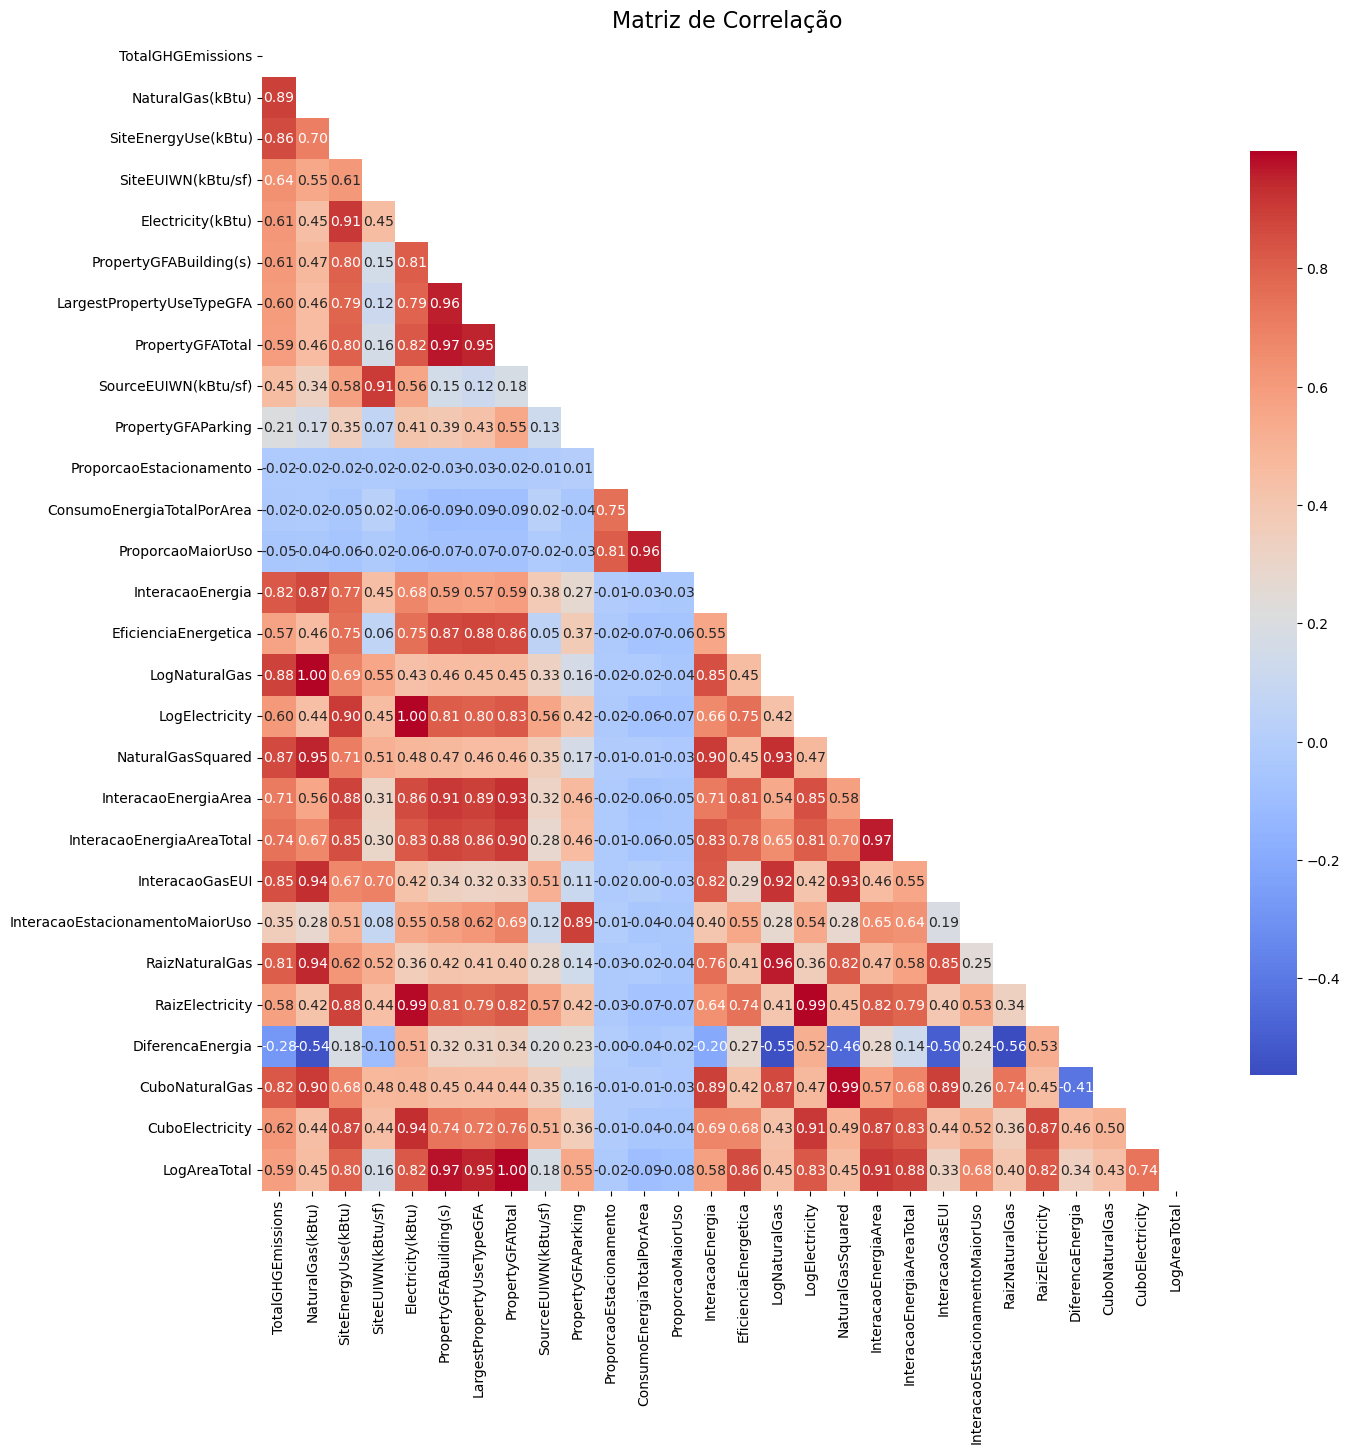

In [171]:
# Supondo que df seja o DataFrame
correlation_matrix = df4_log.corr()

# Criar uma máscara para a parte superior da matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar o tamanho do gráfico
plt.figure(figsize=(15, 15))

# Criar o mapa de calor com a máscara
sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True,  # Mostrar os valores
            fmt=".2f",   # Formato dos números
            cmap="coolwarm",  # Escolha de cores
            cbar_kws={"shrink": 0.8})  # Personalização da barra de cores

# Título opcional
plt.title("Matriz de Correlação", fontsize=16)

# Exibir o gráfico
plt.show()

In [197]:
# Calculando a correlação
correlation_matrix = df4_log.corr()
print(correlation_matrix["TotalGHGEmissions"].sort_values(ascending=False))

TotalGHGEmissions                  1.000000
NaturalGas(kBtu)                   0.892590
LogNaturalGas                      0.884943
NaturalGasSquared                  0.869620
SiteEnergyUse(kBtu)                0.858149
InteracaoGasEUI                    0.847862
CuboNaturalGas                     0.823285
InteracaoEnergia                   0.821076
RaizNaturalGas                     0.814005
InteracaoEnergiaAreaTotal          0.742859
InteracaoEnergiaArea               0.711389
SiteEUIWN(kBtu/sf)                 0.638421
CuboElectricity                    0.616461
Electricity(kBtu)                  0.613834
PropertyGFABuilding(s)             0.606732
LogElectricity                     0.604041
LargestPropertyUseTypeGFA          0.597428
PropertyGFATotal                   0.594425
LogAreaTotal                       0.587550
RaizElectricity                    0.580817
EficienciaEnergetica               0.565937
SourceEUIWN(kBtu/sf)               0.454667
InteracaoEstacionamentoMaiorUso 

In [ ]:
TotalGHGEmissions                  1.000000
NaturalGas(kBtu)                   0.892590
LogNaturalGas                      0.884943
NaturalGasSquared                  0.869620
SiteEnergyUse(kBtu)                0.858149
InteracaoGasEUI                    0.847862
CuboNaturalGas                     0.823285
InteracaoEnergia                   0.821076
RaizNaturalGas                     0.814005
InteracaoEnergiaAreaTotal          0.742859
InteracaoEnergiaArea               0.711389
SiteEUIWN(kBtu/sf)                 0.638421
CuboElectricity                    0.616461
Electricity(kBtu)                  0.613834
PropertyGFABuilding(s)             0.606732
LogElectricity                     0.604041
LargestPropertyUseTypeGFA          0.597428
PropertyGFATotal                   0.594425
LogAreaTotal                       0.587550
RaizElectricity                    0.580817
EficienciaEnergetica               0.565937

In [198]:
variaveis_para_manter = [
    'TotalGHGEmissions',  # Corrigido o nome da coluna
    'NaturalGas(kBtu)',
    'LogNaturalGas',
    'NaturalGasSquared',
    'SiteEnergyUse(kBtu)',
    'InteracaoGasEUI',
    'CuboNaturalGas',
    'InteracaoEnergia',
    'RaizNaturalGas',
    'InteracaoEnergiaAreaTotal',
    'InteracaoEnergiaArea',
    'SiteEUIWN(kBtu/sf)',
    'CuboElectricity',
    'Electricity(kBtu)',
    'PropertyGFABuilding(s)',
    'LogElectricity',
    'LargestPropertyUseTypeGFA',
    'PropertyGFATotal',
    'LogAreaTotal',
    'RaizElectricity',
    'EficienciaEnergetica'
]

In [199]:
df4_log.head()

,TotalGHGEmissions,NaturalGas(kBtu),SiteEnergyUse(kBtu),SiteEUIWN(kBtu/sf),Electricity(kBtu),PropertyGFABuilding(s),LargestPropertyUseTypeGFA,PropertyGFATotal,SourceEUIWN(kBtu/sf),PropertyGFAParking,ProporcaoEstacionamento,ConsumoEnergiaTotalPorArea,ProporcaoMaiorUso,InteracaoEnergia,EficienciaEnergetica,LogNaturalGas,LogElectricity,NaturalGasSquared,InteracaoEnergiaArea,InteracaoEnergiaAreaTotal,InteracaoGasEUI,InteracaoEstacionamentoMaiorUso,RaizNaturalGas,RaizElectricity,DiferencaEnergia,CuboNaturalGas,CuboElectricity,LogAreaTotal
0,49.300,0.176090,0.168970,0.254708,0.133917,0.251821,0.301924,0.177847,0.244770,0.000000,0.000000,0.950086,1.697663,0.023581,0.663387,0.162196,0.125678,0.031008,0.030051,0.055134,0.044852,0.000000,0.419631,0.365947,-0.042173,0.005460,0.002402,0.163688
1,79.200,0.252710,0.312678,0.412473,0.315057,0.260896,0.344335,0.313733,0.444031,0.693147,2.209352,0.996636,1.097542,0.079618,0.758057,0.225309,0.273880,0.063862,0.098097,0.178127,0.104236,0.238675,0.502702,0.561299,0.062347,0.016139,0.031273,0.272873
2,54.200,0.000000,0.671879,0.427031,0.693147,0.405885,0.498706,0.314224,0.567508,0.000000,0.000000,2.138217,1.587103,0.000000,1.573372,0.000000,0.526589,0.000000,0.211120,0.217803,0.000000,0.000000,0.000000,0.832555,0.693147,0.000000,0.333025,0.273246
3,13.800,0.000000,0.218859,0.349051,0.331187,0.267953,0.248922,0.192012,0.469706,0.000000,0.000000,1.139822,1.296390,0.000000,0.627012,0.000000,0.286071,0.000000,0.042023,0.063592,0.000000,0.000000,0.000000,0.575489,0.331187,0.000000,0.036326,0.175642
4,211.494,0.693147,0.693147,0.693147,0.588256,0.232780,0.111618,0.161163,0.693147,0.000000,0.000000,4.300914,0.692582,0.407748,1.000000,0.526589,0.462637,0.480453,0.111710,0.206514,0.480453,0.000000,0.832555,0.766979,-0.104891,0.333025,0.203563,0.149422


In [200]:
# Verificando as colunas do DataFrame
print(df4_log.columns)

# Verificando quais variáveis da lista não estão no DataFrame
colunas_faltando = [col for col in variaveis_para_manter if col not in df4_log.columns]
print("Colunas faltando:", colunas_faltando)


Index(['TotalGHGEmissions', 'NaturalGas(kBtu)', 'SiteEnergyUse(kBtu)',
       'SiteEUIWN(kBtu/sf)', 'Electricity(kBtu)', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'PropertyGFATotal', 'SourceEUIWN(kBtu/sf)',
       'PropertyGFAParking', 'ProporcaoEstacionamento',
       'ConsumoEnergiaTotalPorArea', 'ProporcaoMaiorUso', 'InteracaoEnergia',
       'EficienciaEnergetica', 'LogNaturalGas', 'LogElectricity',
       'NaturalGasSquared', 'InteracaoEnergiaArea',
       'InteracaoEnergiaAreaTotal', 'InteracaoGasEUI',
       'InteracaoEstacionamentoMaiorUso', 'RaizNaturalGas', 'RaizElectricity',
       'DiferencaEnergia', 'CuboNaturalGas', 'CuboElectricity',
       'LogAreaTotal'],
      dtype='object')
Colunas faltando: []


In [180]:
df4_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8747 entries, 0 to 8746
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TotalGHGEmissions                8747 non-null   float64
 1   NaturalGas(kBtu)                 8747 non-null   float64
 2   SiteEnergyUse(kBtu)              8747 non-null   float64
 3   SiteEUIWN(kBtu/sf)               8747 non-null   float64
 4   Electricity(kBtu)                8747 non-null   float64
 5   PropertyGFABuilding(s)           8747 non-null   float64
 6   LargestPropertyUseTypeGFA        8747 non-null   float64
 7   PropertyGFATotal                 8747 non-null   float64
 8   SourceEUIWN(kBtu/sf)             8747 non-null   float64
 9   PropertyGFAParking               8747 non-null   float64
 10  ProporcaoEstacionamento          8740 non-null   float64
 11  ConsumoEnergiaTotalPorArea       8747 non-null   float64
 12  ProporcaoMaiorUso   

In [202]:
df4_log = df4_log[variaveis_para_manter]

df4_log.head()

,TotalGHGEmissions,NaturalGas(kBtu),LogNaturalGas,NaturalGasSquared,SiteEnergyUse(kBtu),InteracaoGasEUI,CuboNaturalGas,InteracaoEnergia,RaizNaturalGas,InteracaoEnergiaAreaTotal,InteracaoEnergiaArea,SiteEUIWN(kBtu/sf),CuboElectricity,Electricity(kBtu),PropertyGFABuilding(s),LogElectricity,LargestPropertyUseTypeGFA,PropertyGFATotal,LogAreaTotal,RaizElectricity,EficienciaEnergetica
0,49.300,0.176090,0.162196,0.031008,0.168970,0.044852,0.005460,0.023581,0.419631,0.055134,0.030051,0.254708,0.002402,0.133917,0.251821,0.125678,0.301924,0.177847,0.163688,0.365947,0.663387
1,79.200,0.252710,0.225309,0.063862,0.312678,0.104236,0.016139,0.079618,0.502702,0.178127,0.098097,0.412473,0.031273,0.315057,0.260896,0.273880,0.344335,0.313733,0.272873,0.561299,0.758057
2,54.200,0.000000,0.000000,0.000000,0.671879,0.000000,0.000000,0.000000,0.000000,0.217803,0.211120,0.427031,0.333025,0.693147,0.405885,0.526589,0.498706,0.314224,0.273246,0.832555,1.573372
3,13.800,0.000000,0.000000,0.000000,0.218859,0.000000,0.000000,0.000000,0.000000,0.063592,0.042023,0.349051,0.036326,0.331187,0.267953,0.286071,0.248922,0.192012,0.175642,0.575489,0.627012
4,211.494,0.693147,0.526589,0.480453,0.693147,0.480453,0.333025,0.407748,0.832555,0.206514,0.111710,0.693147,0.203563,0.588256,0.232780,0.462637,0.111618,0.161163,0.149422,0.766979,1.000000


# Exportando os Datasets

In [216]:
# Juntando o conjunto de dados 1: 
df1 = pd.concat([df1_log, y_1], axis=1)

In [217]:
# Juntando o conjunto de dados 2: 
df2 = pd.concat([df2_log, y_2], axis=1)

In [218]:
df3 = df3_log.copy()

In [219]:
df4 = df4_log.copy()

In [220]:
# Caminho para salvar o arquivo
caminho_arquivo = r"C:\Users\Yago\Desktop\GitHubLocal\HomeWork2\1.dados"

# Exportando o DataFrame para um arquivo CSV
df1.to_csv(caminho_arquivo + r"\df1.csv", index=False, encoding='utf-8')

# Exportando o DataFrame para um arquivo CSV
df2.to_csv(caminho_arquivo + r"\df2.csv", index=False, encoding='utf-8')

# Exportando o DataFrame para um arquivo CSV
df3.to_csv(caminho_arquivo + r"\df3.csv", index=False, encoding='utf-8')

# Exportando o DataFrame para um arquivo CSV
df4.to_csv(caminho_arquivo + r"\df4.csv", index=False, encoding='utf-8')

print(f"Arquivo salvo em: {caminho_arquivo}")


Arquivo salvo em: C:\Users\Yago\Desktop\GitHubLocal\HomeWork2\1.dados
